# Section I - Data Exploration and Prepocessing

Section I will be further subdivided into three parts: 
* Part A - Basic Data Structure
* Part B - Data Exploration
* Part C - Data Preprocessing

#### Part A - Basic Data Structure
The initial data set from zillow includes a separate file for the transactions, which includes the log error of actual sales price versus Zillow estimates, and a training data set that has 59 features. We will take a look at the basic data structure of both the data files, "properties.csv" and "train_csv."  We will take note of the size of the data sets, the data types present, and any major data issues present. From a quick glance at the datasets, it appears to have a high number of missing values. 



#### Part B - Data Exploration
We will explore the data using various plots such as Boxplots and histograms. We cross check with the data dictionary provide to determine if the boxplot and histogram make "sense". This section will just be a a snap shot of the data exploration process. A full exploration of all the features in the dataset is available in the appendices.    

##### Steps 
* 1 Import Car Reliability Datasets
* 2 Check Features and data structure
* 3 Univariate Exploration of features : Continous and Categorical  
* 4 Bivariate Exploration of features : Continous and Categorical


#### Part C - Data Preprocessing
The goal of the Data Preprocessing is to make the dataset compatiable for various Machine Learning algorithms. This will requrie creating dummy variables for the categorical features and standizing continous features. Some features will be removed as they present no significant information or is beyone the scope of this capstone. Most of the work will be done in the "Missing Data.py" file. A snapshot of some of the steps will be provided here. 

##### Steps  
* 1 Univaritate Analysis: Visualize features(Historgram,Boxplot, etc.)       
* 2 Impute Missing Value
* 3 Create Dummy variables
* 4  Drop features


In [1]:
#Import Required Libraries
import numpy as np   #Mathematics library
import matplotlib.pyplot as plt # for plotting
import pandas as pd  #manage datasets
import seaborn as sea
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sea.set_context("poster")
sea.set_style('whitegrid')

%pylab inline 
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Importing Datasets
df = pd.read_csv('training.csv')


In [3]:
#########################Briefly Look at each data set
df.shape

(72983, 34)

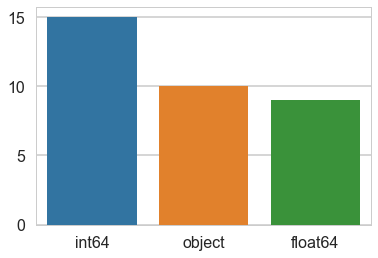

In [4]:
sea.barplot( x = df.dtypes.unique(), y = df.dtypes.value_counts(), data = df)


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [6]:
df.head(3)

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   

                 Model Trim           SubModel      ...       \
0               MAZDA3    i         4D SEDAN I      ...        
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT      ...        
2           STRATUS V6  SXT   4D SEDAN SXT FFV      ...        

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                      11597.0                    12409.0        NaN      NaN   
1                      11374.0                    12791.0        NaN      NaN   
2                       7146.0                     8702.0        NaN      NaN   

   BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0  21973  33619   FL   7100.0             0          1113  
1  19638  33619   FL   7600.0             0          1053  
2  19638  33619   FL   4900.0             0          1389  

[3 rows x 34 columns]

In [7]:
#Check if Dataframe has null values
pd.isnull(df).values.any() 

True

In [8]:
#Get count of null values for each feature
print(df.isnull().sum())

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [9]:
# We may add to model later, but drop purchast date since it probably doesn't have anything to do with condition of car
df=df.drop('PurchDate',axis=1)

In [10]:
"""The Wheel type ID is a redundant field. 
It is probably an attempt to convert the catergorical field of wheel type into dummy variable. 
Since we will do that ours we will delete this column
"""
df=df.drop('WheelTypeID',axis=1)

#### Explore the 'Auction' (Categorical Feation)

In [11]:
# See how many unique values there are
print(df['Auction'].nunique())

3


In [12]:
#See a list of the unique values
print(df['Auction'].unique())

['ADESA' 'OTHER' 'MANHEIM']


In [13]:
# Get a count of missing values in this feature
print(df['VehYear'].isnull().sum())

0


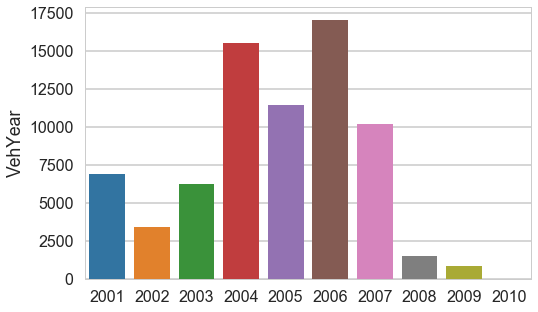

In [14]:
#Since there are no misising data, we can visualize the plot right away
sea.mpl.rc("figure", figsize=(8,5))
sea.barplot( x = df['VehYear'].unique(), y = df['VehYear'].value_counts(), data = df)


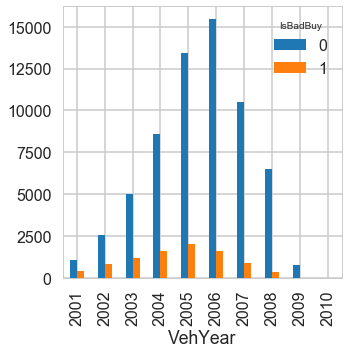

In [15]:
#Vehicle Year   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["VehYear"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(5,5), stacked=False)

#### Explore the 'VehicleAge' (Numerical Feation)

In [16]:
# See how many unique values there are
print(df['VehicleAge'].nunique())

10


In [17]:
#See a list of the unique values
print(df['VehicleAge'].unique())

[3 5 4 2 8 6 7 9 1 0]


In [18]:
# Get a count of missing values in this feature
print(df['VehicleAge'].isnull().sum())

0


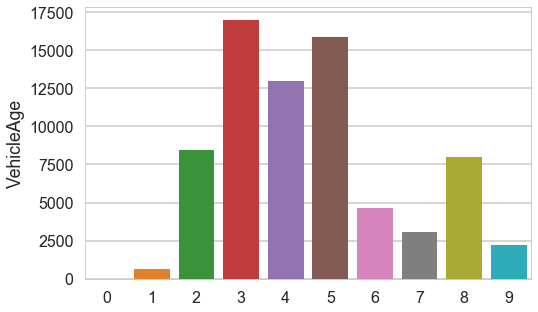

In [19]:
#Since there are no misising data, we can visualize the plot right away
sea.barplot( x = df['VehicleAge'].unique(), y = df['VehicleAge'].value_counts(), data = df)


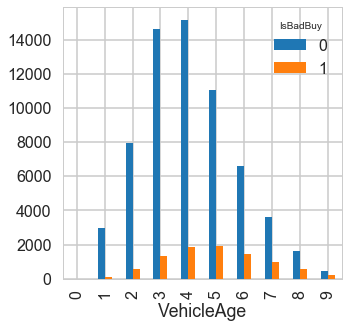

In [20]:
#Vehicle Age   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["VehicleAge"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(5,5), stacked=False)

#### Explore 'Make' (Categorical)

In [21]:
# See how many unique values there are
print(df['Make'].nunique())

33


In [22]:
#See a list of the unique values
print(df['Make'].unique())

['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI' 'JEEP'
 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU' 'LINCOLN' 'MINI'
 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH' 'LEXUS' 'ACURA'
 'TOYOTA SCION' 'HUMMER']


In [23]:
# Get a count of missing values in this feature
print(df['Make'].isnull().sum())

0


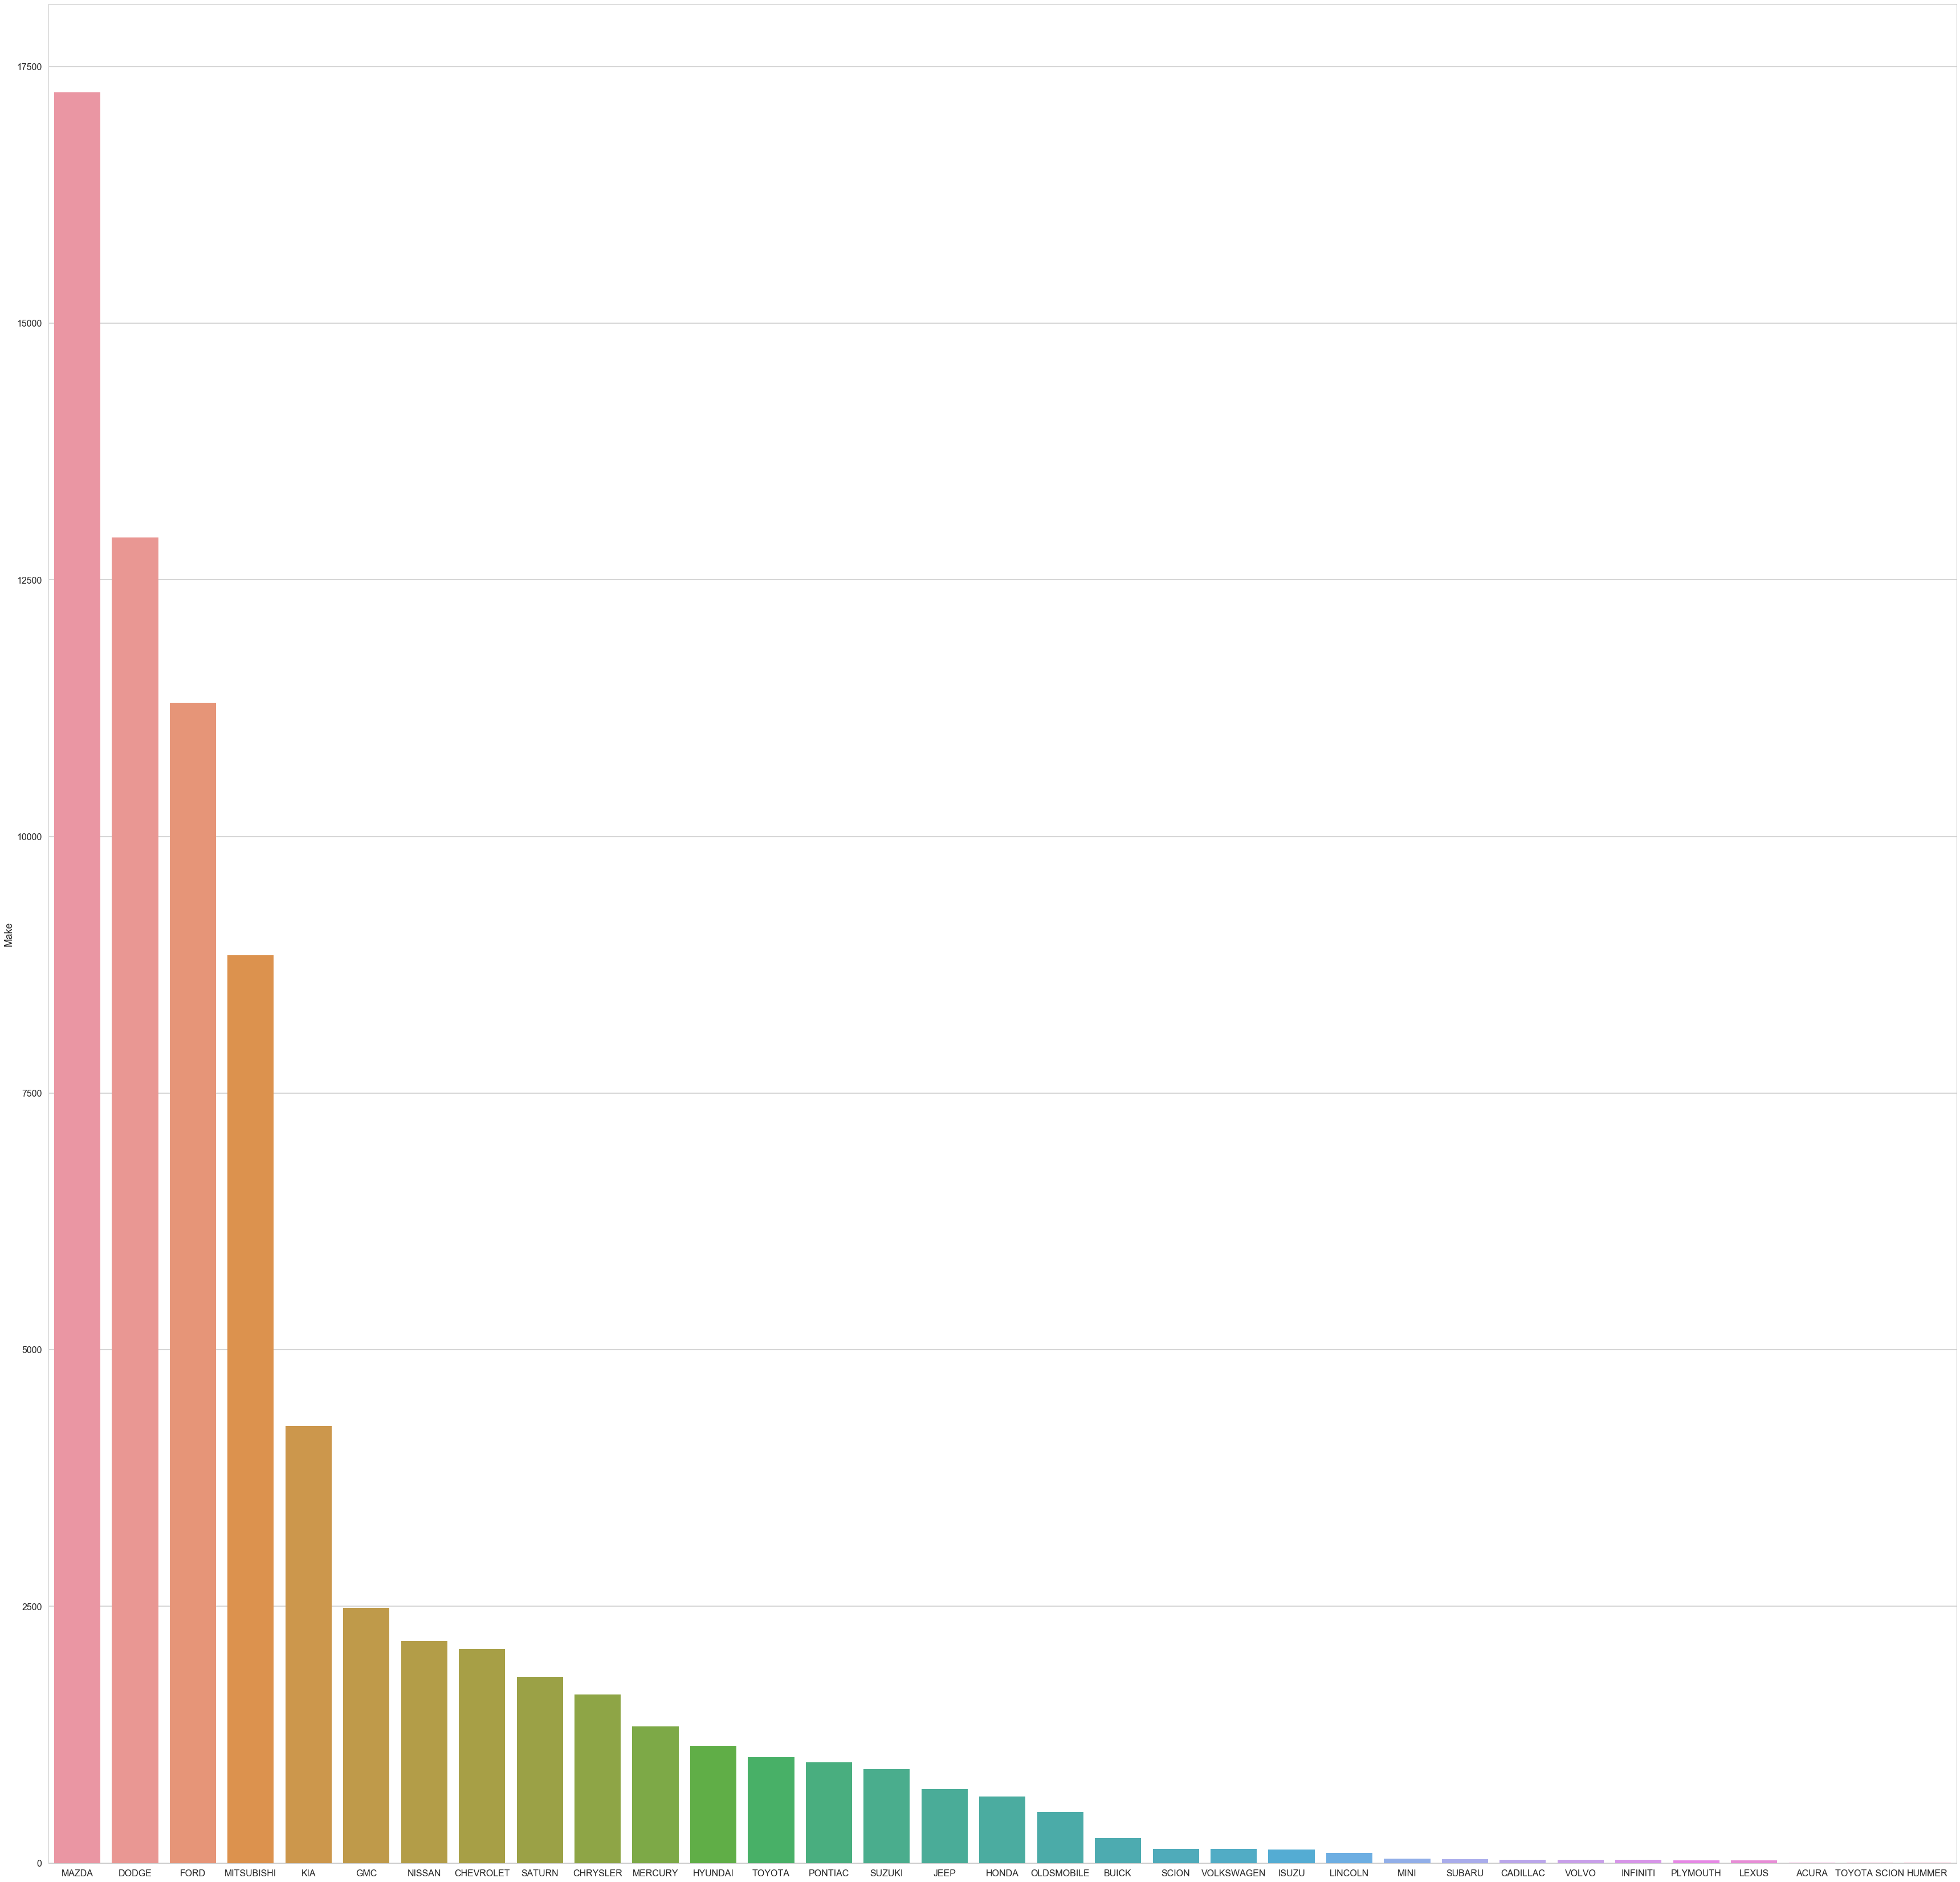

In [24]:
#Since there are no misising data, we can visualize the plot right away
sea.mpl.rc("figure", figsize=(60,60))
sea.barplot( x = df['Make'].unique(), y = df['Make'].value_counts(), data = df)


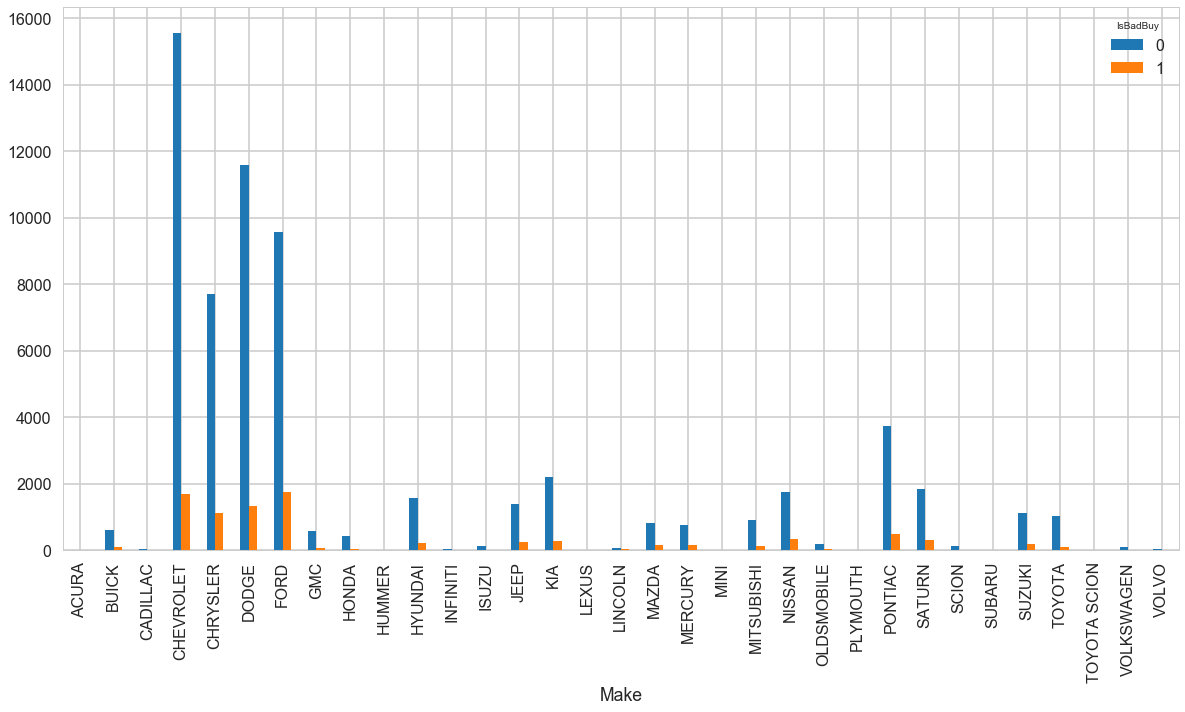

In [25]:
#Vehicle Age   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Make"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(20,10), stacked=False)

#### ExploreModel (Categorical)

In [26]:
# See how many unique values there are
print(df['Model'].nunique())

1063


In [27]:
#See a list of the unique values
print(df['Model'].unique())

['MAZDA3' '1500 RAM PICKUP 2WD' 'STRATUS V6' ..., 'EXCURSION 4WD V8 5.4'
 'M45 4.5L V8 MPI / SF' 'PATRIOT 2WD 4C 2.0L']


In [28]:
# Get a count of missing values in this feature
print(df['Model'].isnull().sum())

0


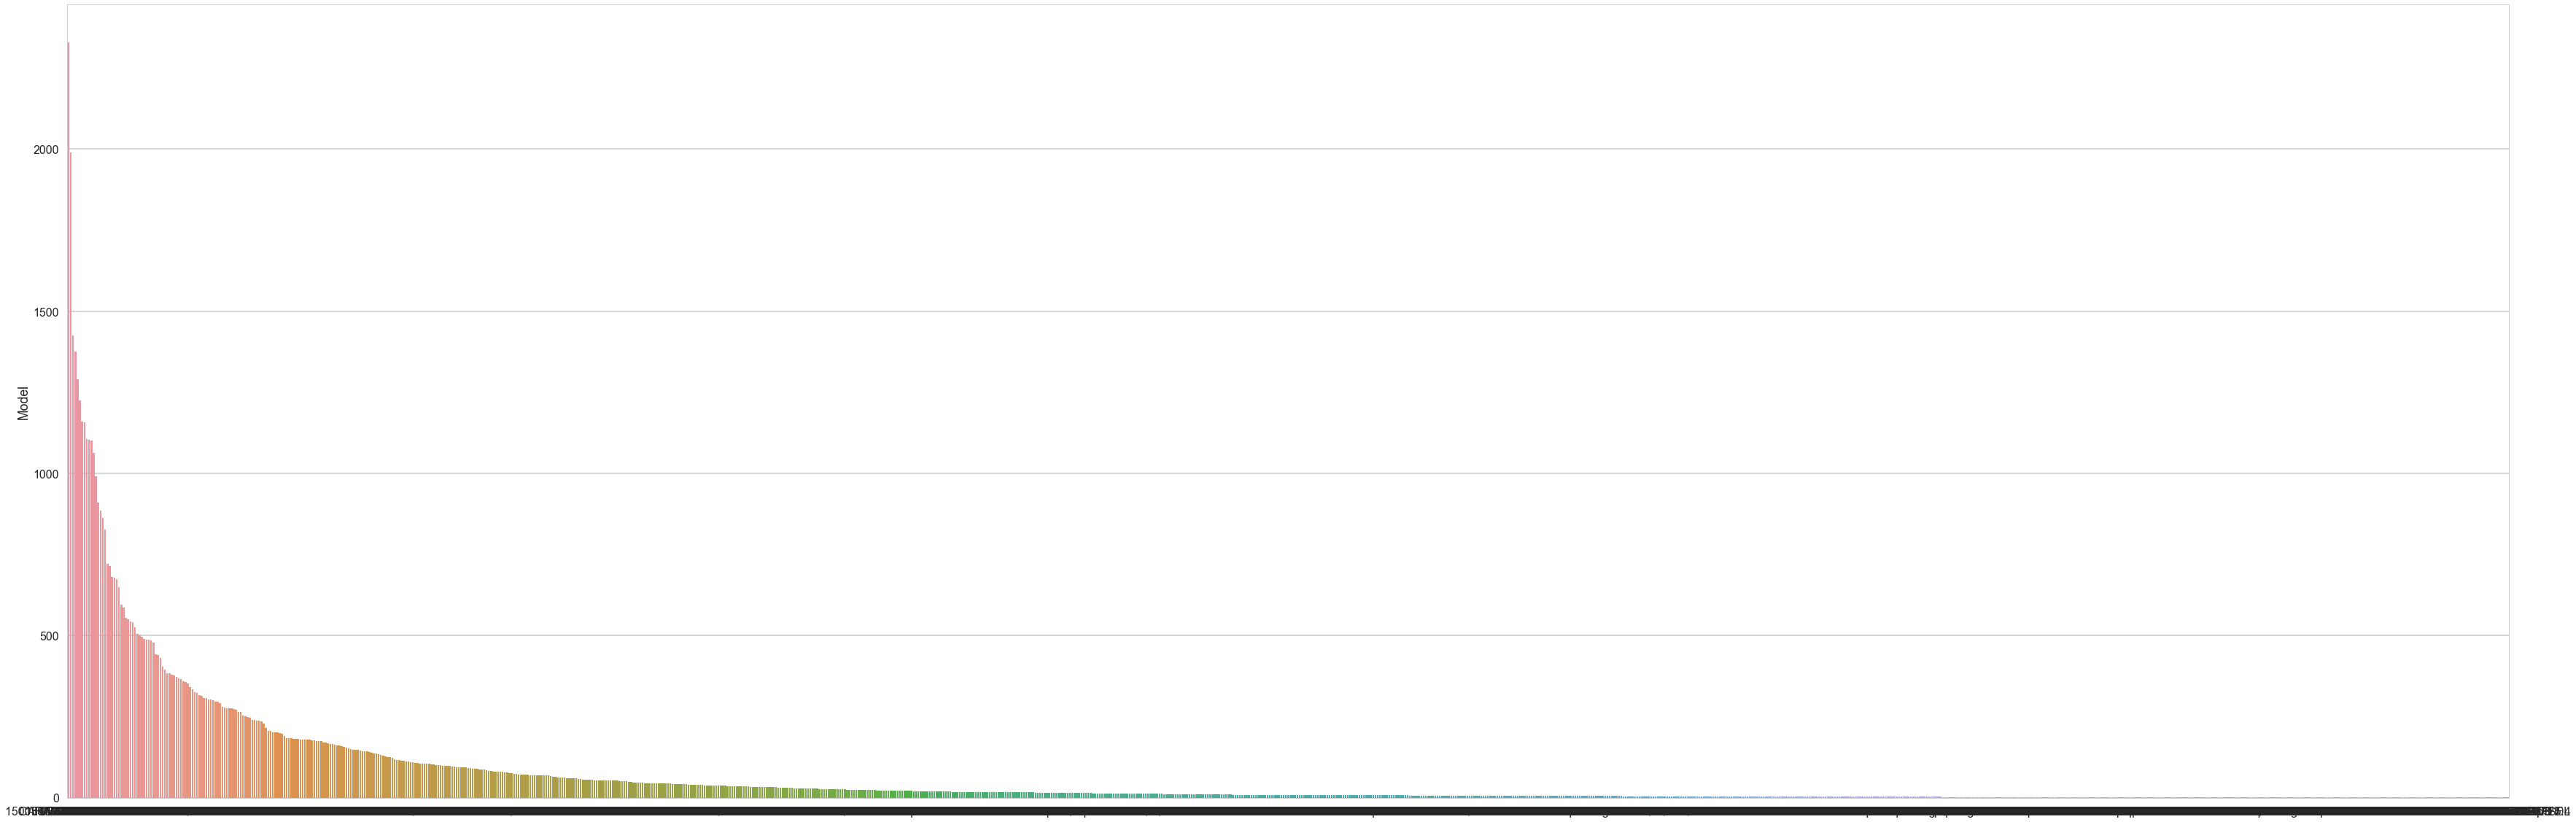

In [29]:
#Since there are no misising data, we can visualize the plot right away
sea.mpl.rc("figure", figsize=(60,20))
sea.barplot( x = df['Model'].unique(), y = df['Model'].value_counts(), data = df)


In [30]:
#Model   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Model"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(200,200), stacked=False)

#### Explore Trim (Categorical)

In [31]:
# See how many unique values there are
print(df['Trim'].nunique())

134


In [32]:
#See a list of the unique values
print(df['Trim'].unique())

['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' nan 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' 'Adv' 'SR5' 'GXP' 'Tou'
 'XLT' 'LT' 'SES' 'XLS' 'GL' 'LE' '1' 'L20' 'Lim' 's' 'Edd' '3' 'Edg' 'ZTW'
 'ZX4' 'STX' 'CX' 'Nor' 'GS' 'XE' 'CXL' 'Ren' 'LTZ' 'ZTS' 'S' 'GTC' 'GTP'
 'Cla' 'Spy' 'LXi' 'SE-' 'Exe' 'Pre' 'SL2' 'GXE' 'SL1' 'Cus' 'GLE' 'DE'
 'Z71' 'Si' 'X' 'SX' 'XR' 'SVT' 'GTS' 'LW3' 'SV6' 'Val' 'Car' 'eL' 'DX'
 'Spe' 'W/T' 'LW2' 'Pro' 'SL' 'L30' 'RT' 'CXS' 'VP' 'Cin' 'Max' 'Ral' 'Sta'
 'Lux' 'R/T' 'Her' 'ZX5' 'Xsp' 'Kin' '3 R' 'Hig' 'GX' 'EX-' 'RS' 'Plu'
 'Ult' 'DS' 'Ove' 'Den' 'XRS' 'SC2' 'Sig' 'SC1' 'XS' 'C' 'ZX2' 'ZXW' 'ZR2'
 'Dur' 'OZ' 'L' '250' 'eC' 'FX4' 'Out' 'L10' 'Maz' 'Ent' 'T5' 'Z24' 'Har'
 'LL' 'Hyb' 'JLX' 'JLS' 'L 3']


In [33]:
# Get a count of missing values in this feature
print(df['Trim'].isnull().sum())

2360


In [34]:
#Since we have missing values, we must imput these values.
#Since its a relative small percentage of data, 
#we will designated these missing as Unknown
#If after converting into dummy variable we see there is significance, we will try another impute method
df["Trim"].fillna('UNK', inplace =True)

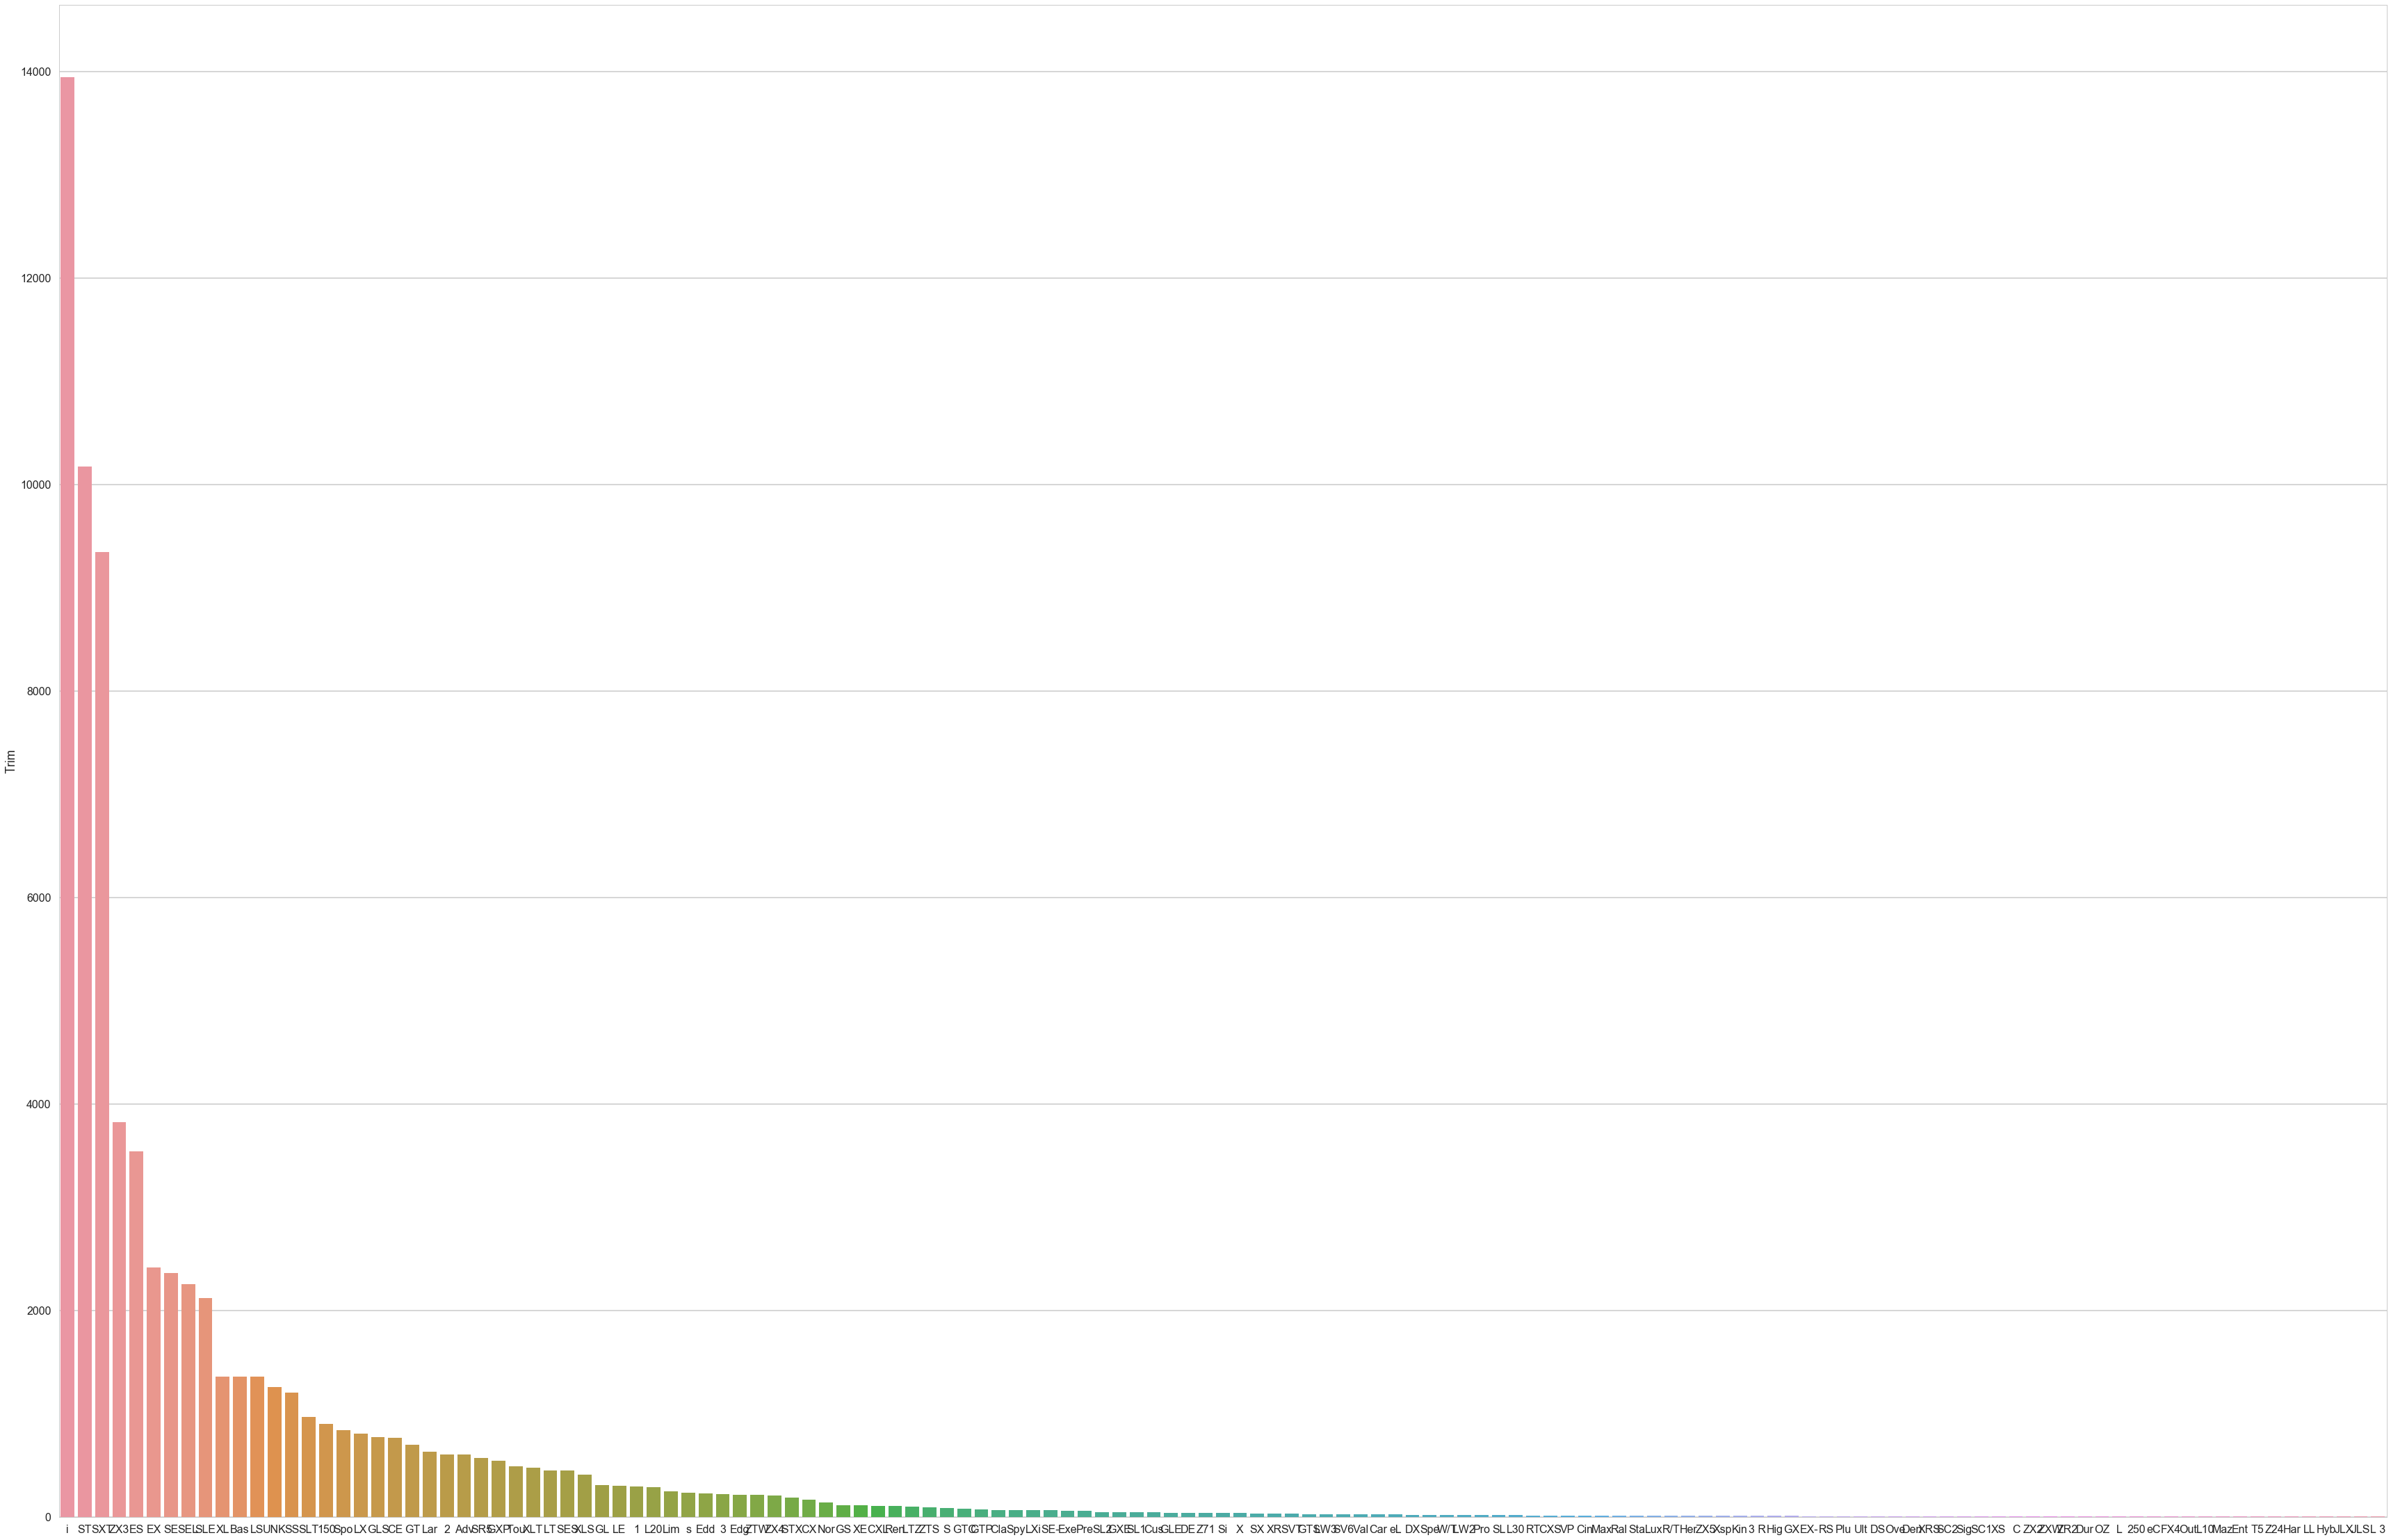

In [35]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(60,40))
sea.barplot( x = df['Trim'].unique(), y = df['Trim'].value_counts(), data = df)


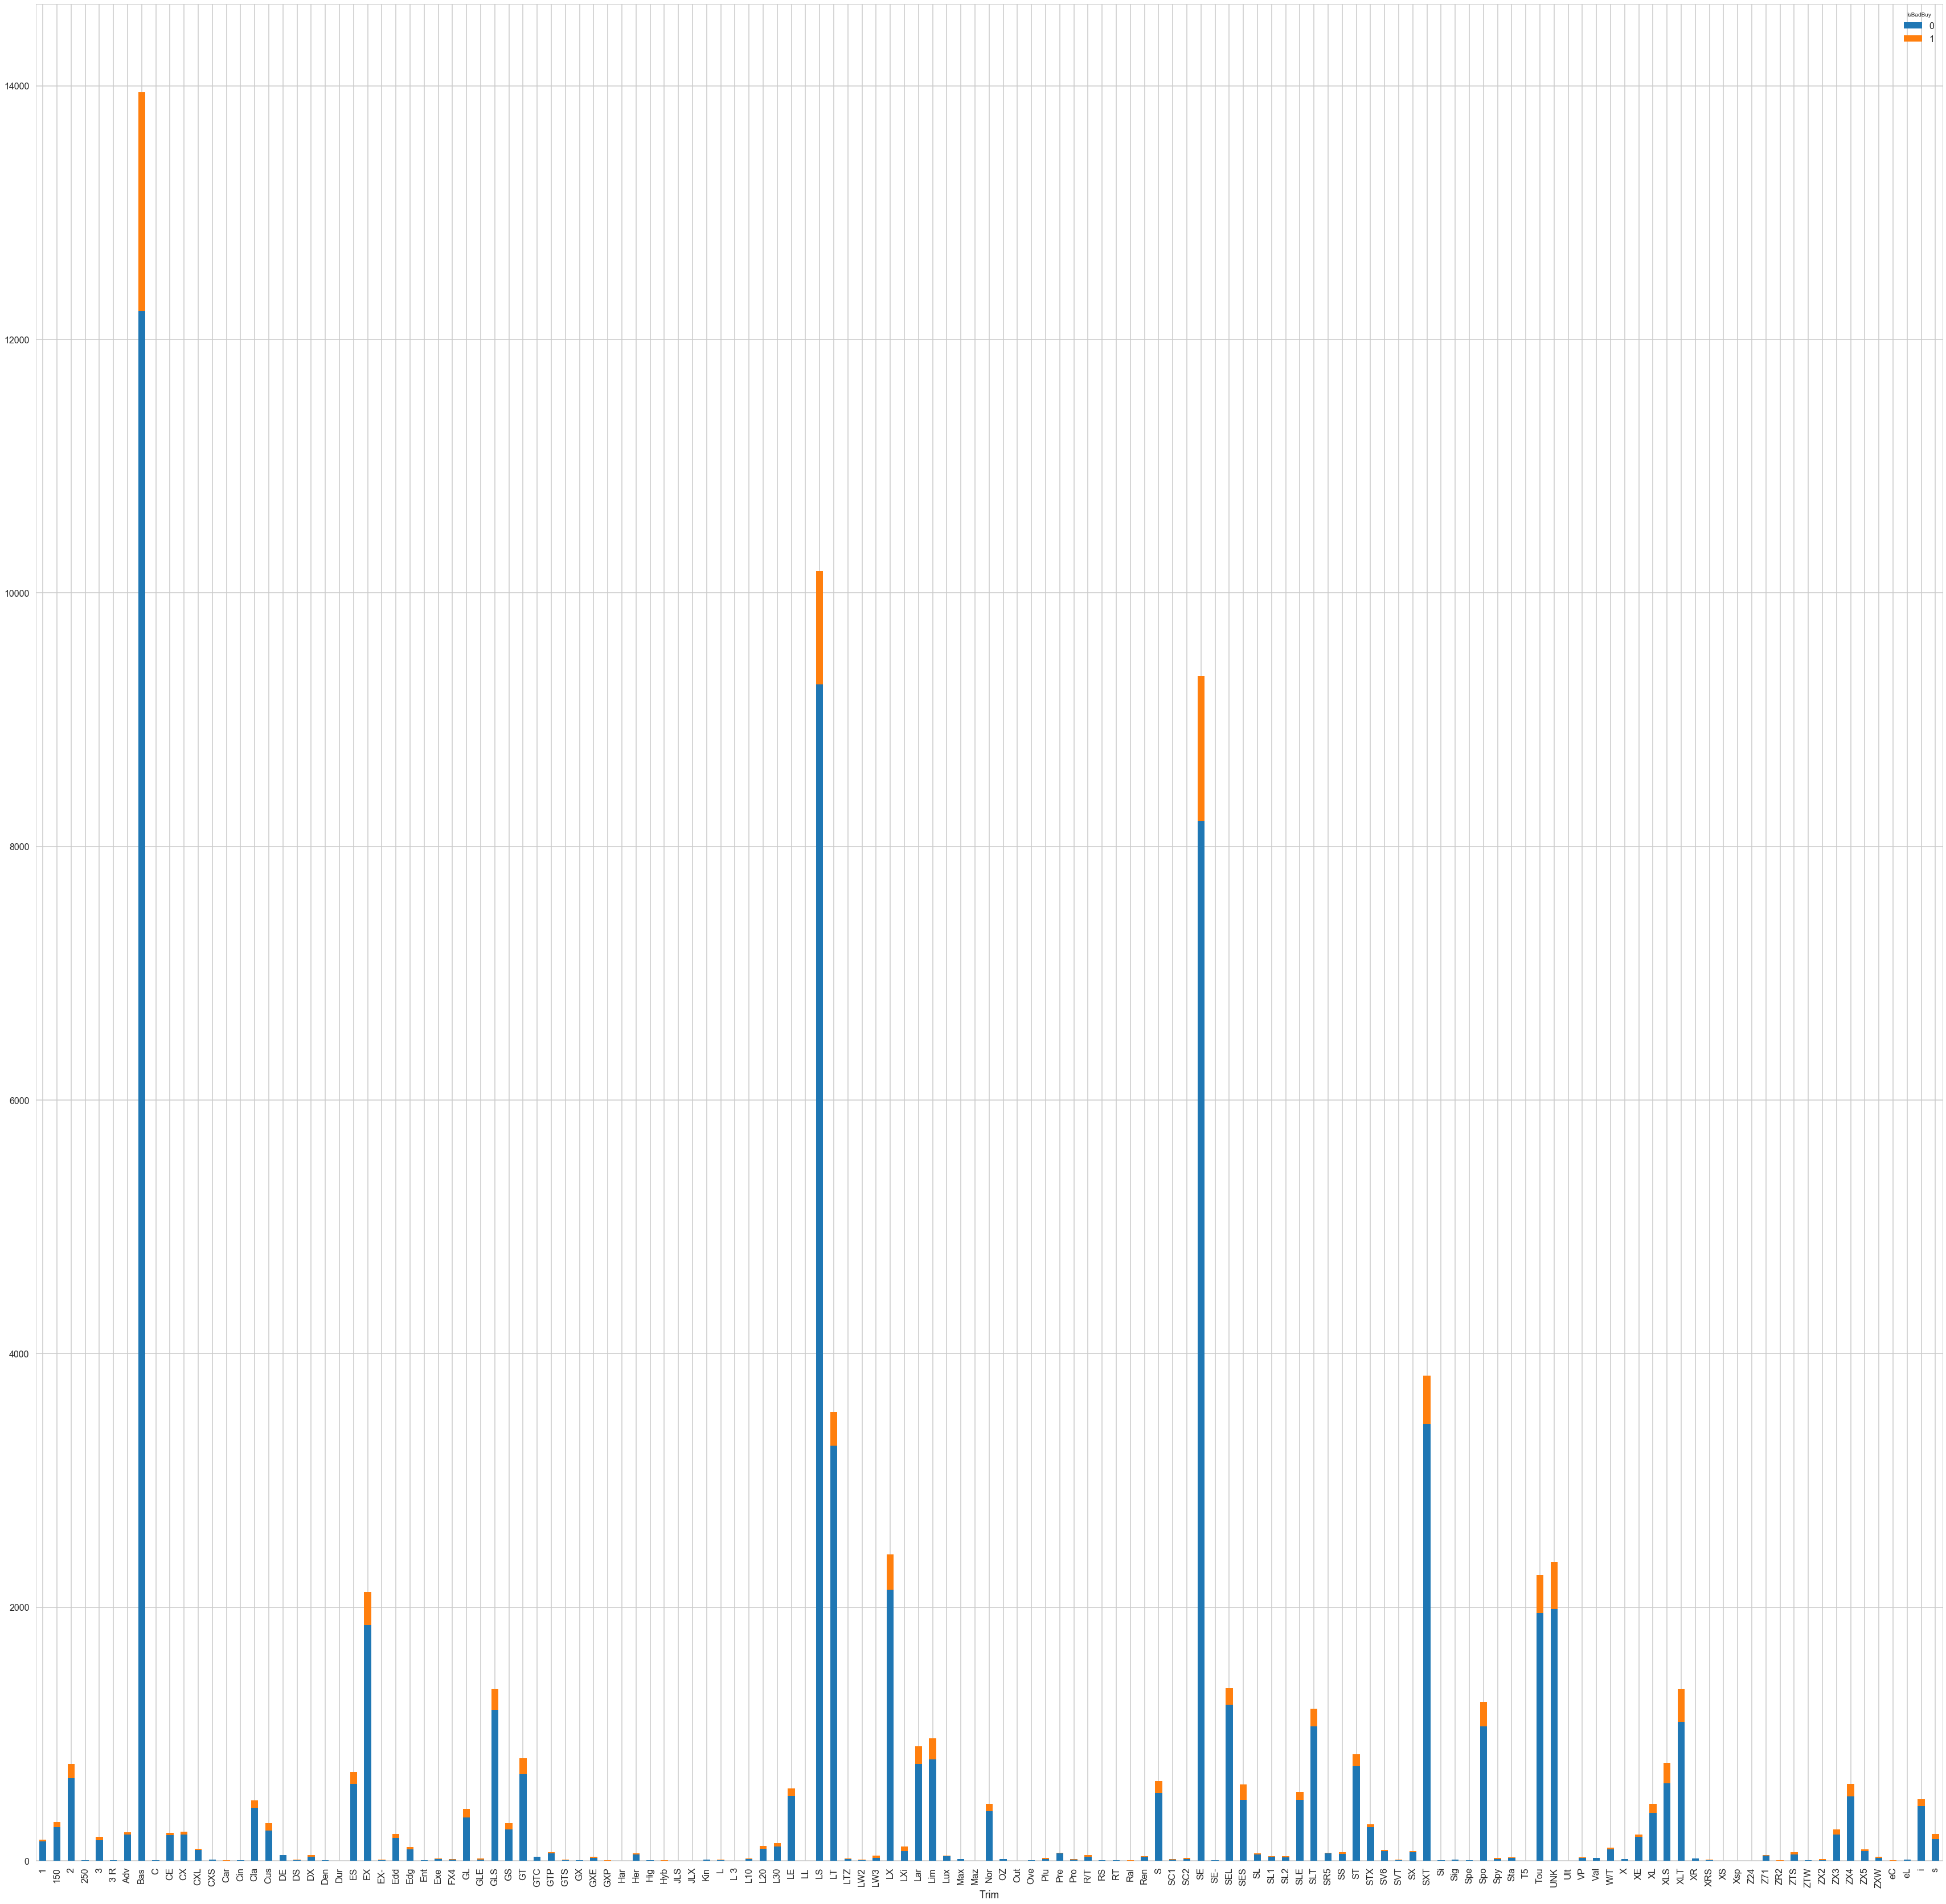

In [36]:
#Trim   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Trim"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(60,60), stacked=True)

#### Explore the SubModel (Categorical)

In [37]:
# See how many unique values there are
print(df['SubModel'].nunique())

863


In [38]:
#See a list of the unique values
print(df['SubModel'].unique())

['4D SEDAN I' 'QUAD CAB 4.7L SLT' '4D SEDAN SXT FFV' '4D SEDAN'
 '2D COUPE ZX3' '4D SEDAN ES' '4D SEDAN EX' '4D SEDAN SE' '4D SEDAN SEL'
 'REG CAB 4.3L' 'REG CAB 4.2L XL' 'MINIVAN 3.3L' 'MINIVAN 3.8L' '2D COUPE'
 '4D SUV 4.2L' '4D CUV 2.2L' '4D UTILITY 4.2L SLE' '2D COUPE SS'
 'PASSENGER 3.4L' '4D SUV 2.2L LS' '4D SEDAN LS PREMIUM' '4D SUV 5.7L SLT'
 'MINIVAN 3.8L SXT' '4D UTILITY 5.3L FFV LS' '2D SUV 4.0L SPORT'
 '4D SUV-PICKUP 5.3L' 'PASSENGER 3.8L LX' 'PASSENGER 3.9L LX'
 '4D WAGON SXT' '4D SEDAN 1.8' '4D SPORT TOURER' '4D SEDAN LS 3.5L FFV'
 'QUAD CAB 5.7L' '4D SPORT UTILITY' '4D SEDAN CE' '4D SEDAN GT'
 'QUAD CAB 4.7L' '4D SEDAN LEVEL 2' '4D SUV 4.7L' '4D SUV 4.7L ADVENTURER'
 '4D SEDAN GLS' '4D SPORT UTILITY SPORT EDITION' '4D SEDAN GXP'
 '4D WAGON SPORT' '4D SUV' 'QUAD CAB 3.7L ST' '4D SUV 5.3L' '4D SEDAN LS'
 '4D SUV 4.6L XLT' '4D SUV 4.7L ST' '4D SPORT UTILITY EX' '4D SUV 2.2L LT'
 '4D SEDAN SES' '4D CUV 3.0L SEL' 'CREW CAB 5.4L KING RANCH'
 '4D SUV 4.2L LS' '4D SUV HARDTOP 2.

In [39]:
# Get a count of missing values in this feature
print(df['SubModel'].isnull().sum())

8


In [40]:
# we have just 8 missing values. Probably doesn't matter how we deal with these 8
# for convienent, we will assign them the most popular submodel
df['SubModel'] = df['SubModel'].fillna(df['SubModel'].mode()[0])


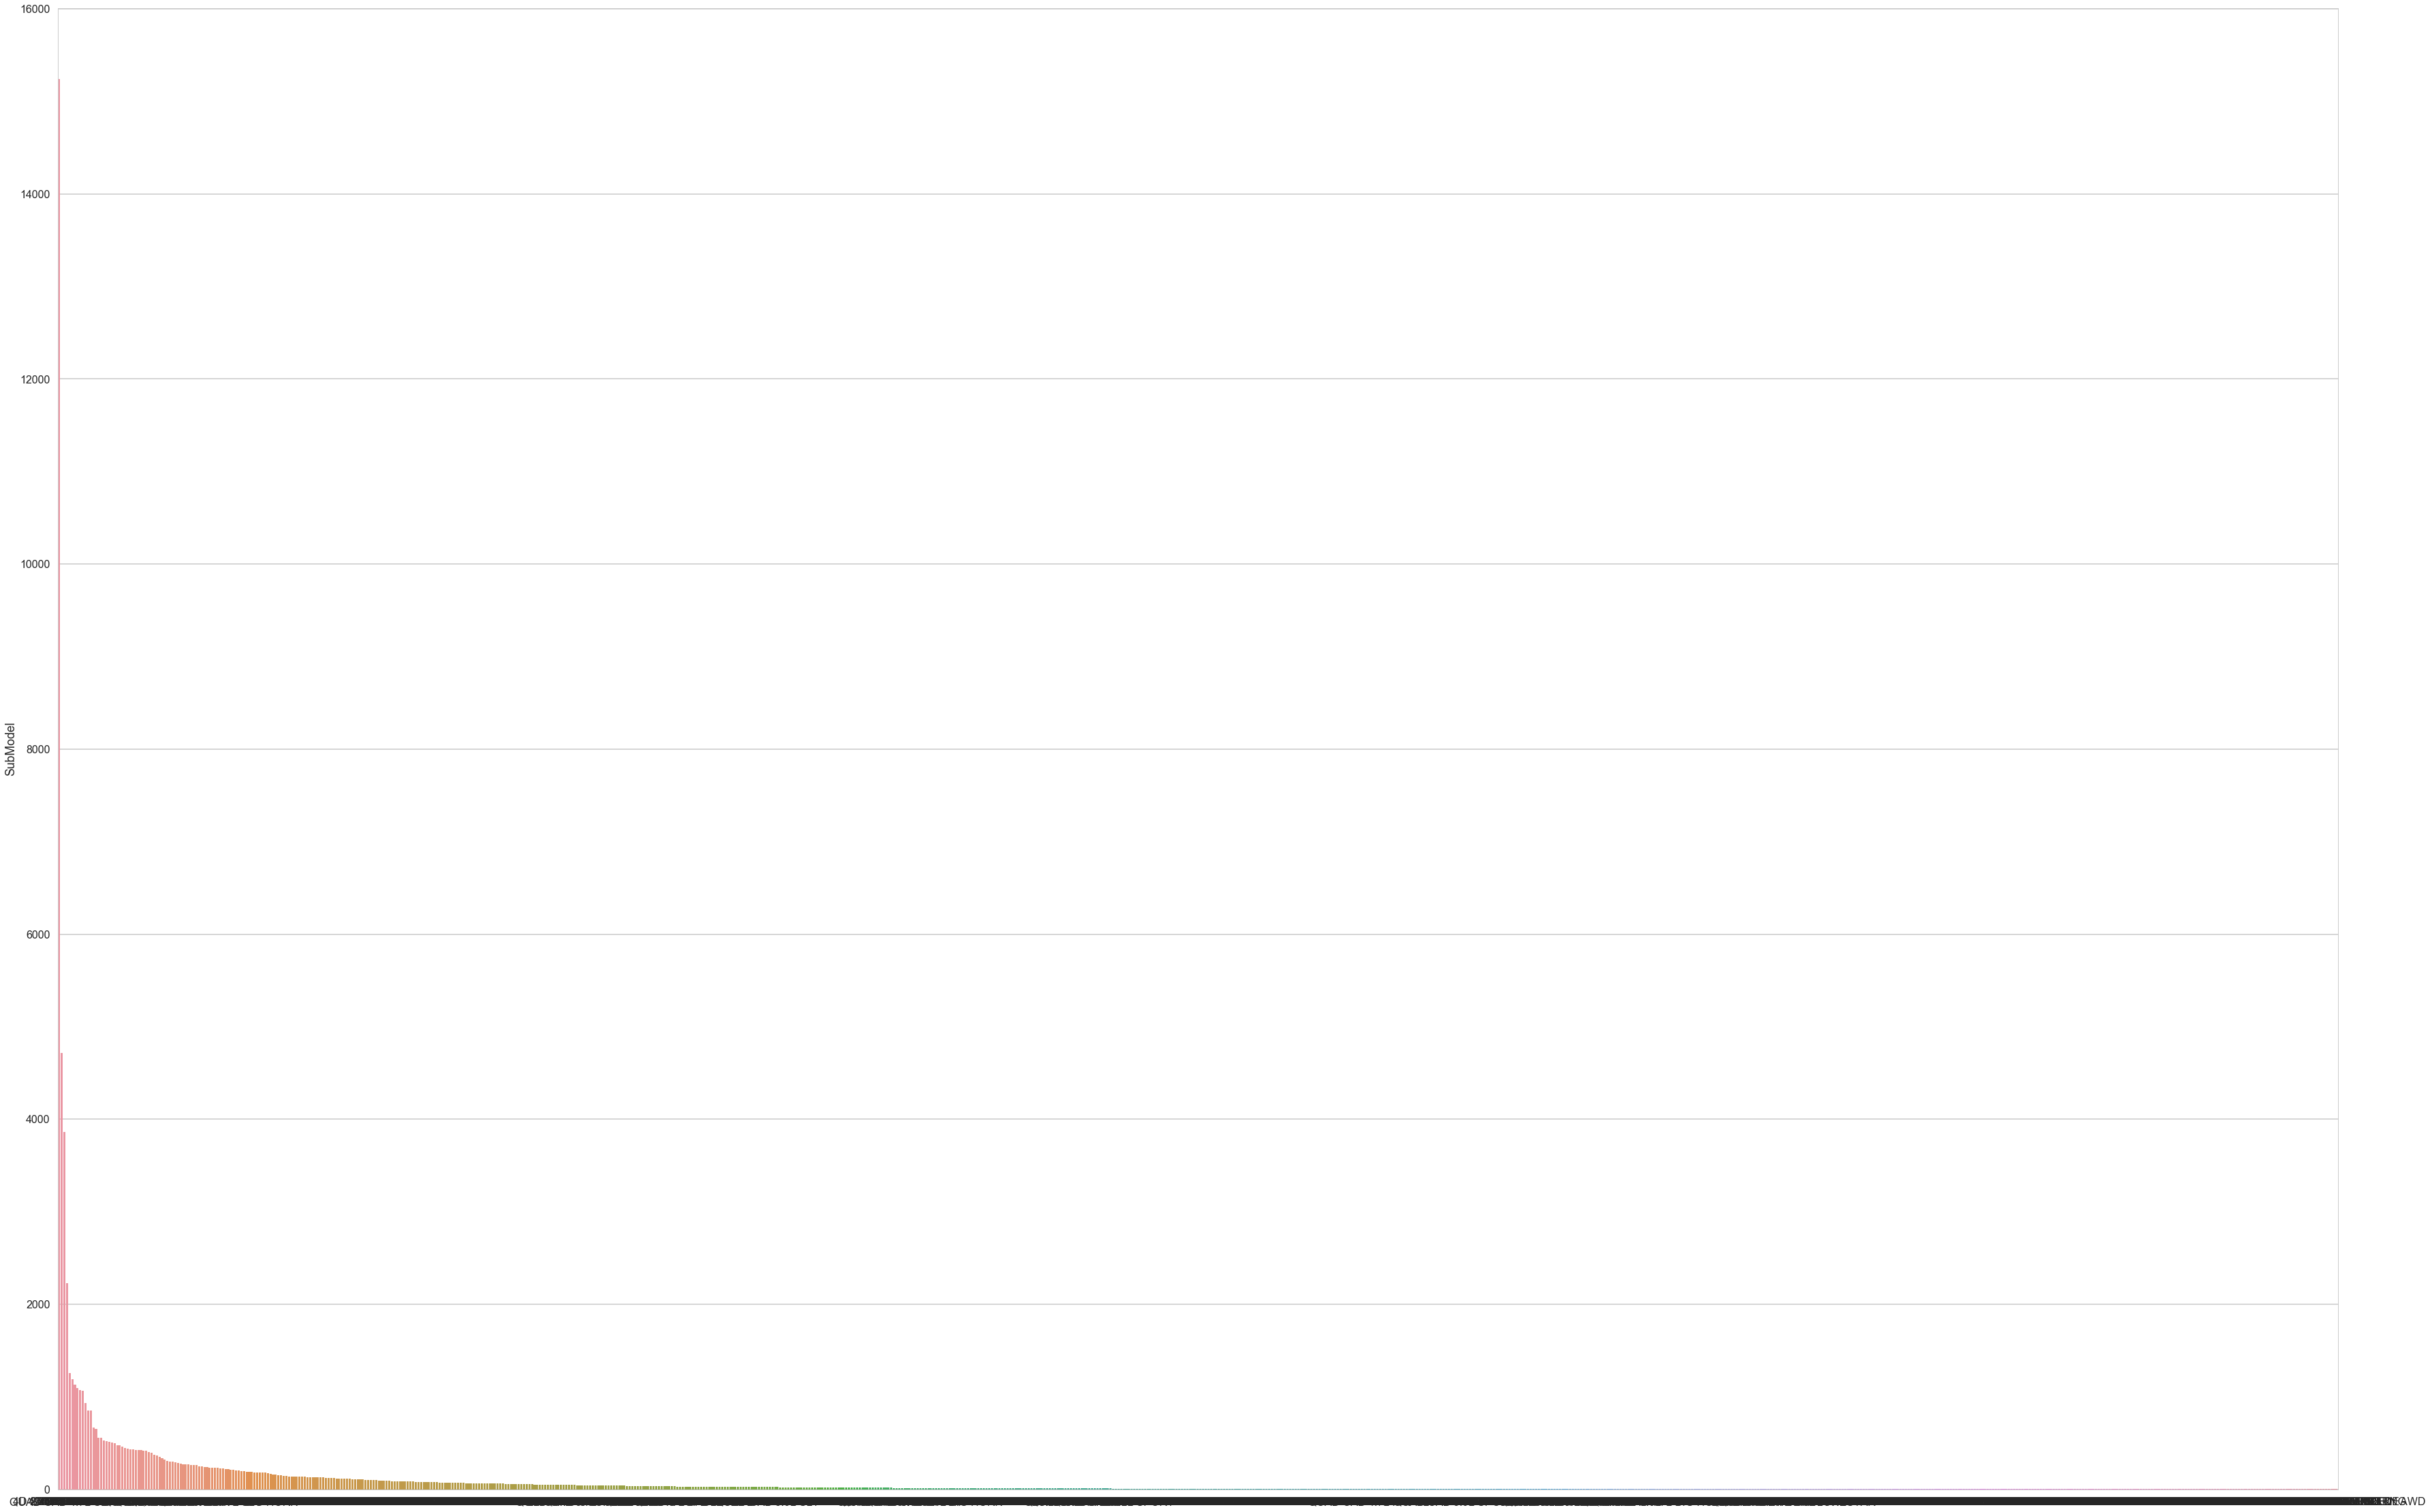

In [41]:
# Since we dealt with missing we can now graph it
sea.barplot( x = df['SubModel'].unique(), y = df['SubModel'].value_counts(), data = df)


#### Explore Color (Categorical)

In [42]:
# See how many unique values there are
print(df['Color'].nunique())

16


In [43]:
#See a list of the unique values
print(df['Color'].unique())

['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'PURPLE' 'ORANGE' 'GREEN' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' nan]


In [44]:
# Get a count of missing values in this feature
print(df['Color'].isnull().sum())

8


In [45]:
#Same as above, it belows to the same 8 records. It would probably be easier to just delete these 8 records, but we will keep them
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])


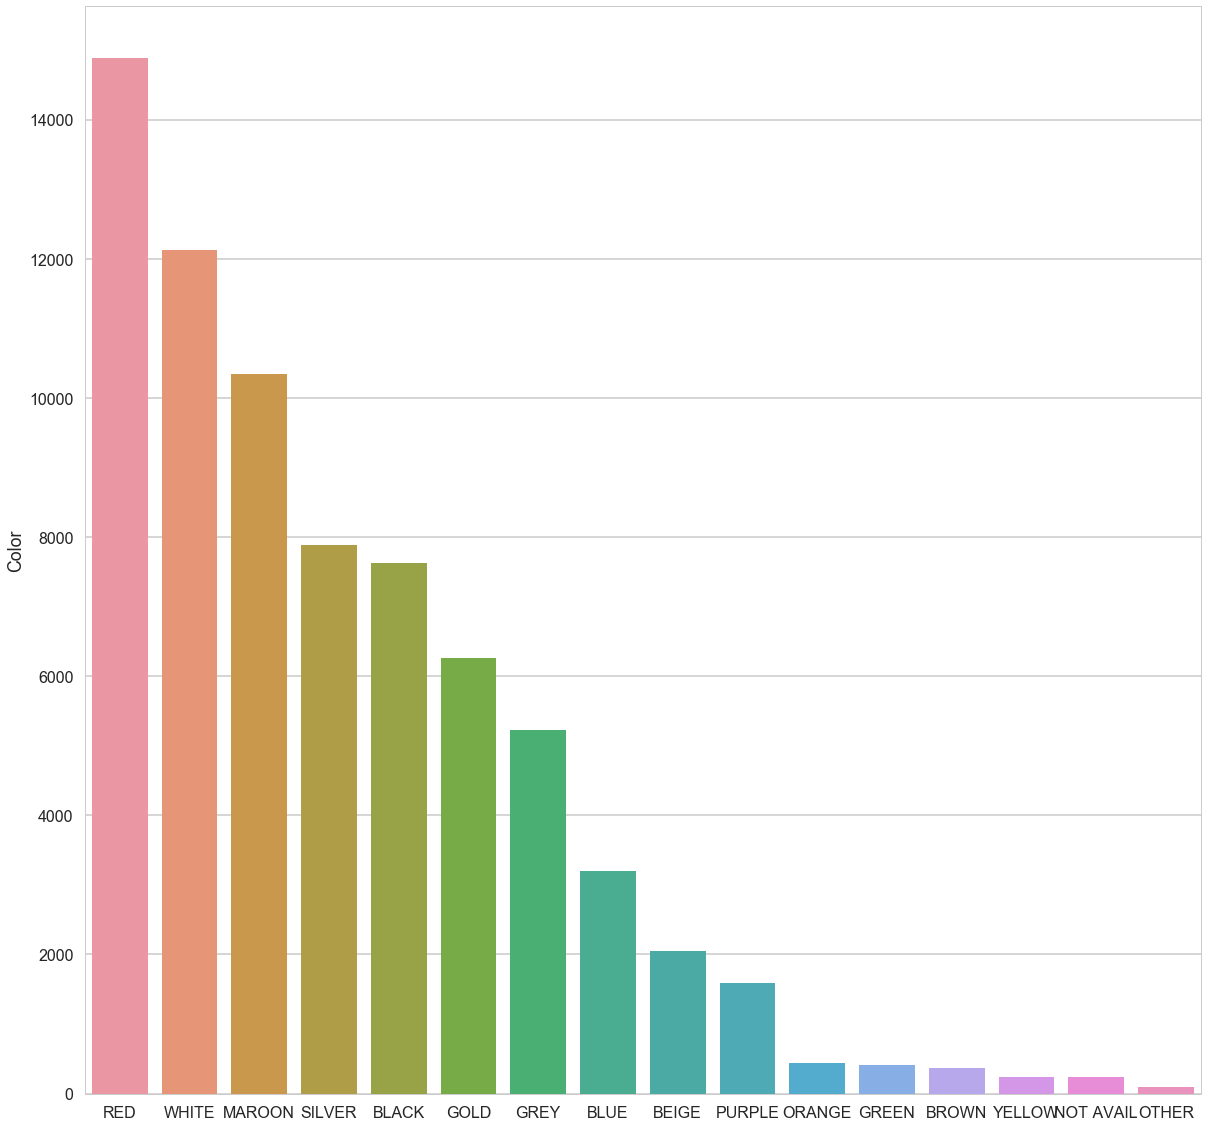

In [46]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(20,20))
sea.barplot( x = df['Color'].unique(), y = df['Color'].value_counts(), data = df)


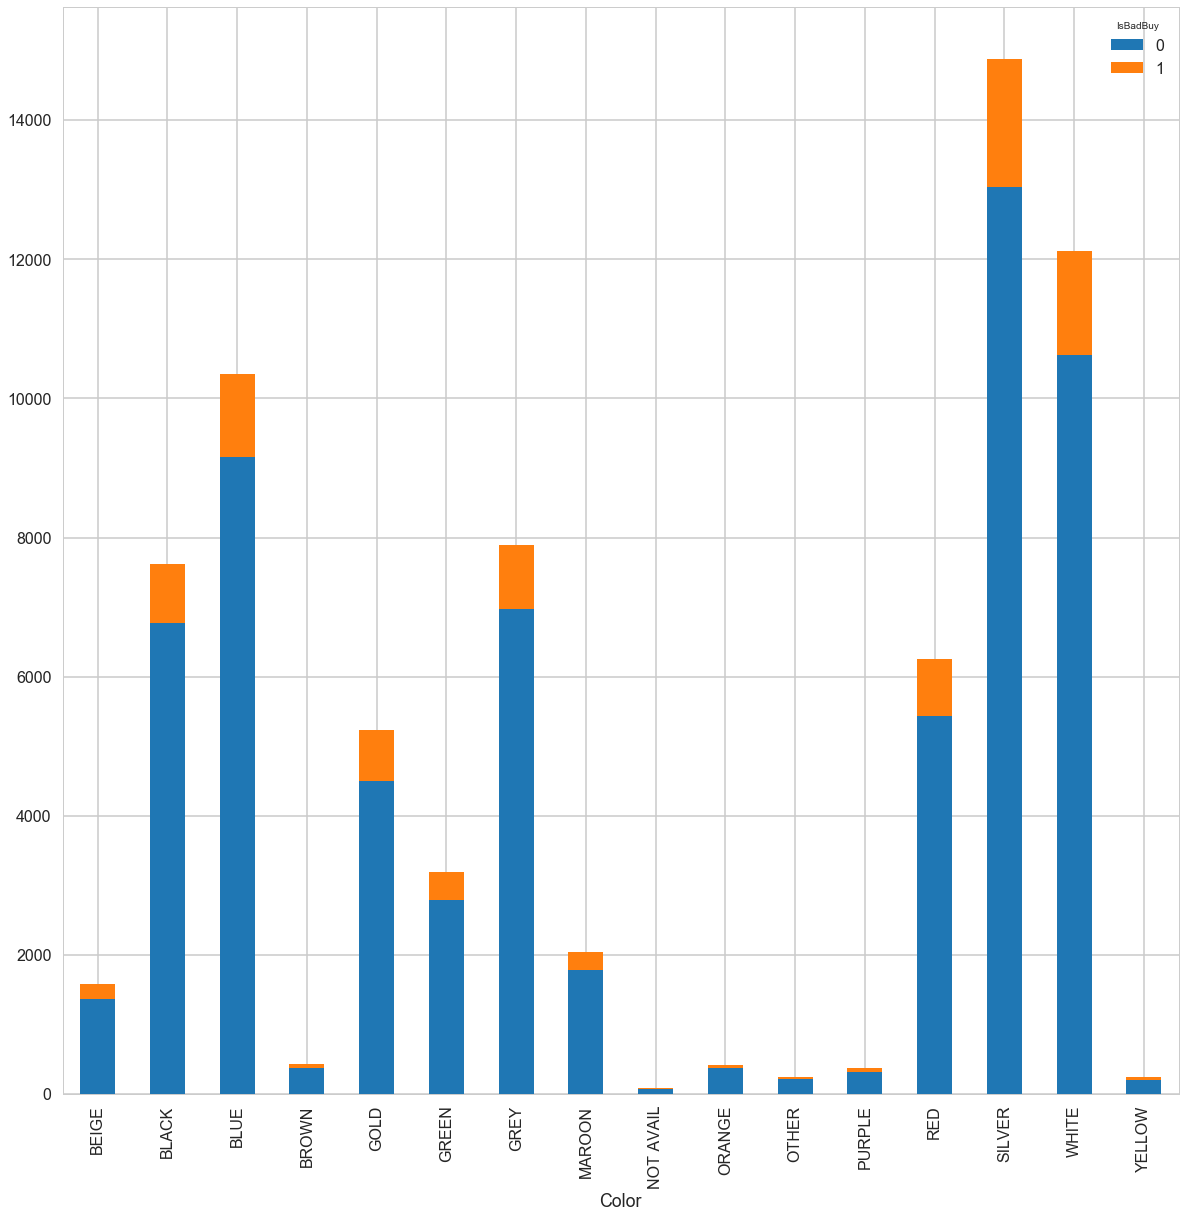

In [47]:
#Color   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Color"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(20,20), stacked=True)

#### Explore Transmission (Categorical)

In [48]:
# See how many unique values there are
print(df['Transmission'].nunique())

3


In [49]:
#See a list of the unique values
print(df['Transmission'].unique())

['AUTO' 'MANUAL' nan 'Manual']


In [50]:
# Get a count of missing values in this feature
print(df['Transmission'].isnull().sum())

9


In [51]:
#We need to combine the two versions of manual transmission
df['Transmission'].replace( 'Manual', 'MANUAL', inplace=True)


In [52]:
# We will impute the missing values with the most popular transmission
df["Transmission"].fillna('AUTO', inplace =True)

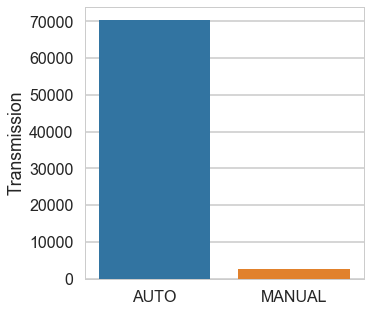

In [53]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.barplot( x = df['Transmission'].unique(), y = df['Transmission'].value_counts(), data = df)


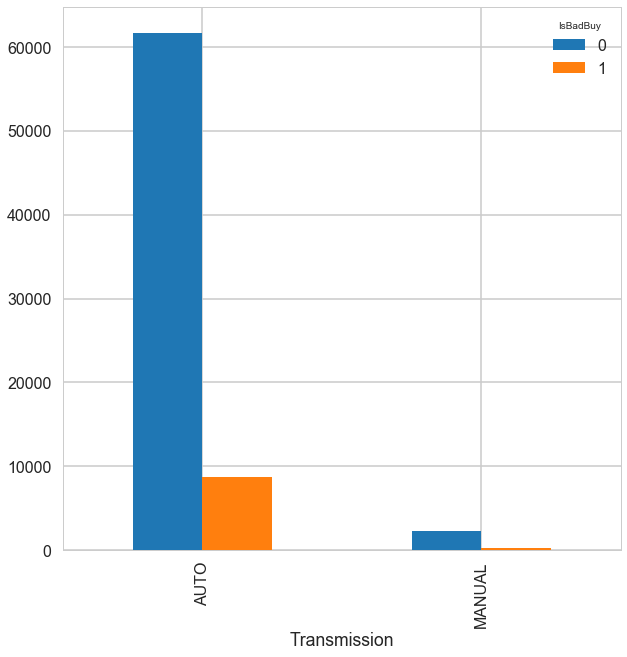

In [54]:
#Transmission   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Transmission"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(10,10), stacked=False)

#### Explore WheelType (Categorical)

In [55]:
# See how many unique values there are
print(df['WheelType'].nunique())

3


In [56]:
#See a list of the unique values
print(df['WheelType'].unique())

['Alloy' 'Covers' nan 'Special']


In [57]:
# Get a count of missing values in this feature
print(df['WheelType'].isnull().sum())

3174


In [58]:
#We will impute the missing to Unknowns
df["WheelType"].fillna('UNK', inplace =True)


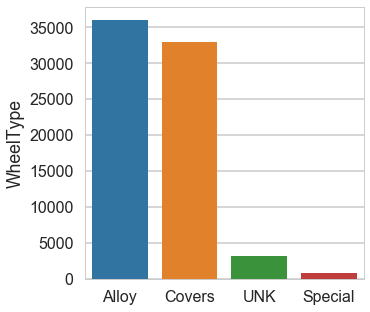

In [59]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.barplot( x = df['WheelType'].unique(), y = df['WheelType'].value_counts(), data = df)


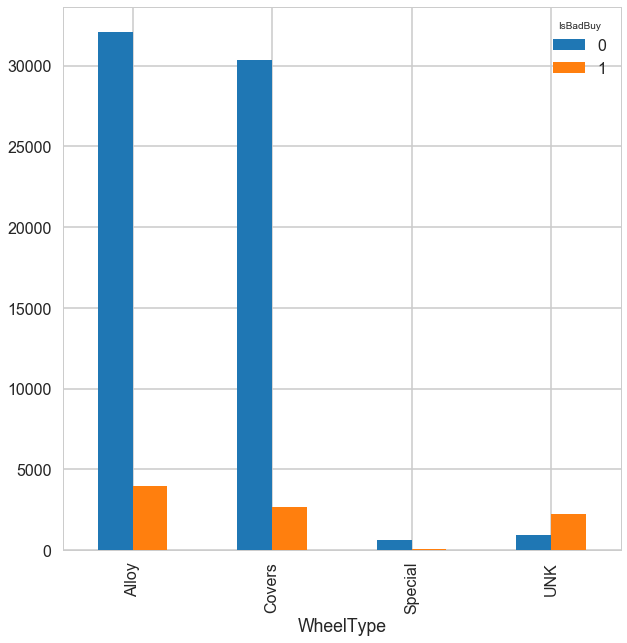

In [60]:
#WheelType   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["WheelType"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(10,10), stacked=False)

#### Explore Nationality (Categorical)

In [61]:
# See how many unique values there are
print(df['Nationality'].nunique())

4


In [62]:
#See a list of the unique values
print(df['Nationality'].unique())

['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER' nan]


In [63]:
# Get a count of missing values in this feature
print(df['Nationality'].isnull().sum())

5


In [64]:
# looking at the data, 4 of the 5 missing cars are american, so we will impute Amecan
df["Nationality"].fillna('AMERICAN', inplace =True)


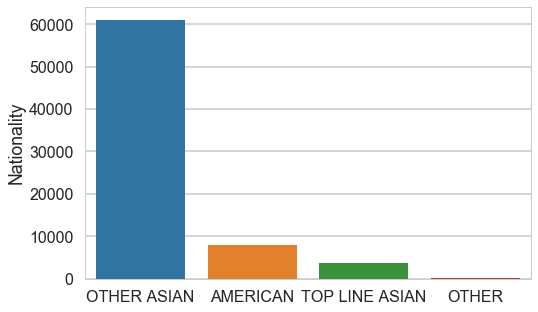

In [65]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(8,5))
sea.barplot( x = df['Nationality'].unique(), y = df['Nationality'].value_counts(), data = df)


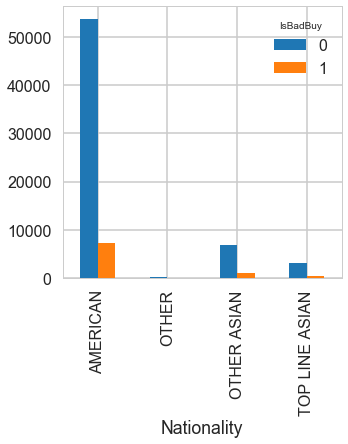

In [66]:
#WheelType   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Nationality"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(5,5), stacked=False)

#### Explore Size (Categorical)

In [67]:
# See how many unique values there are
print(df['Size'].nunique())

12


In [68]:
#See a list of the unique values
print(df['Size'].unique())

['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK' nan]


In [69]:
# Get a count of missing values in this feature
print(df['Size'].isnull().sum())

5


In [70]:
#We will impute the missing size with the most popular size
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])

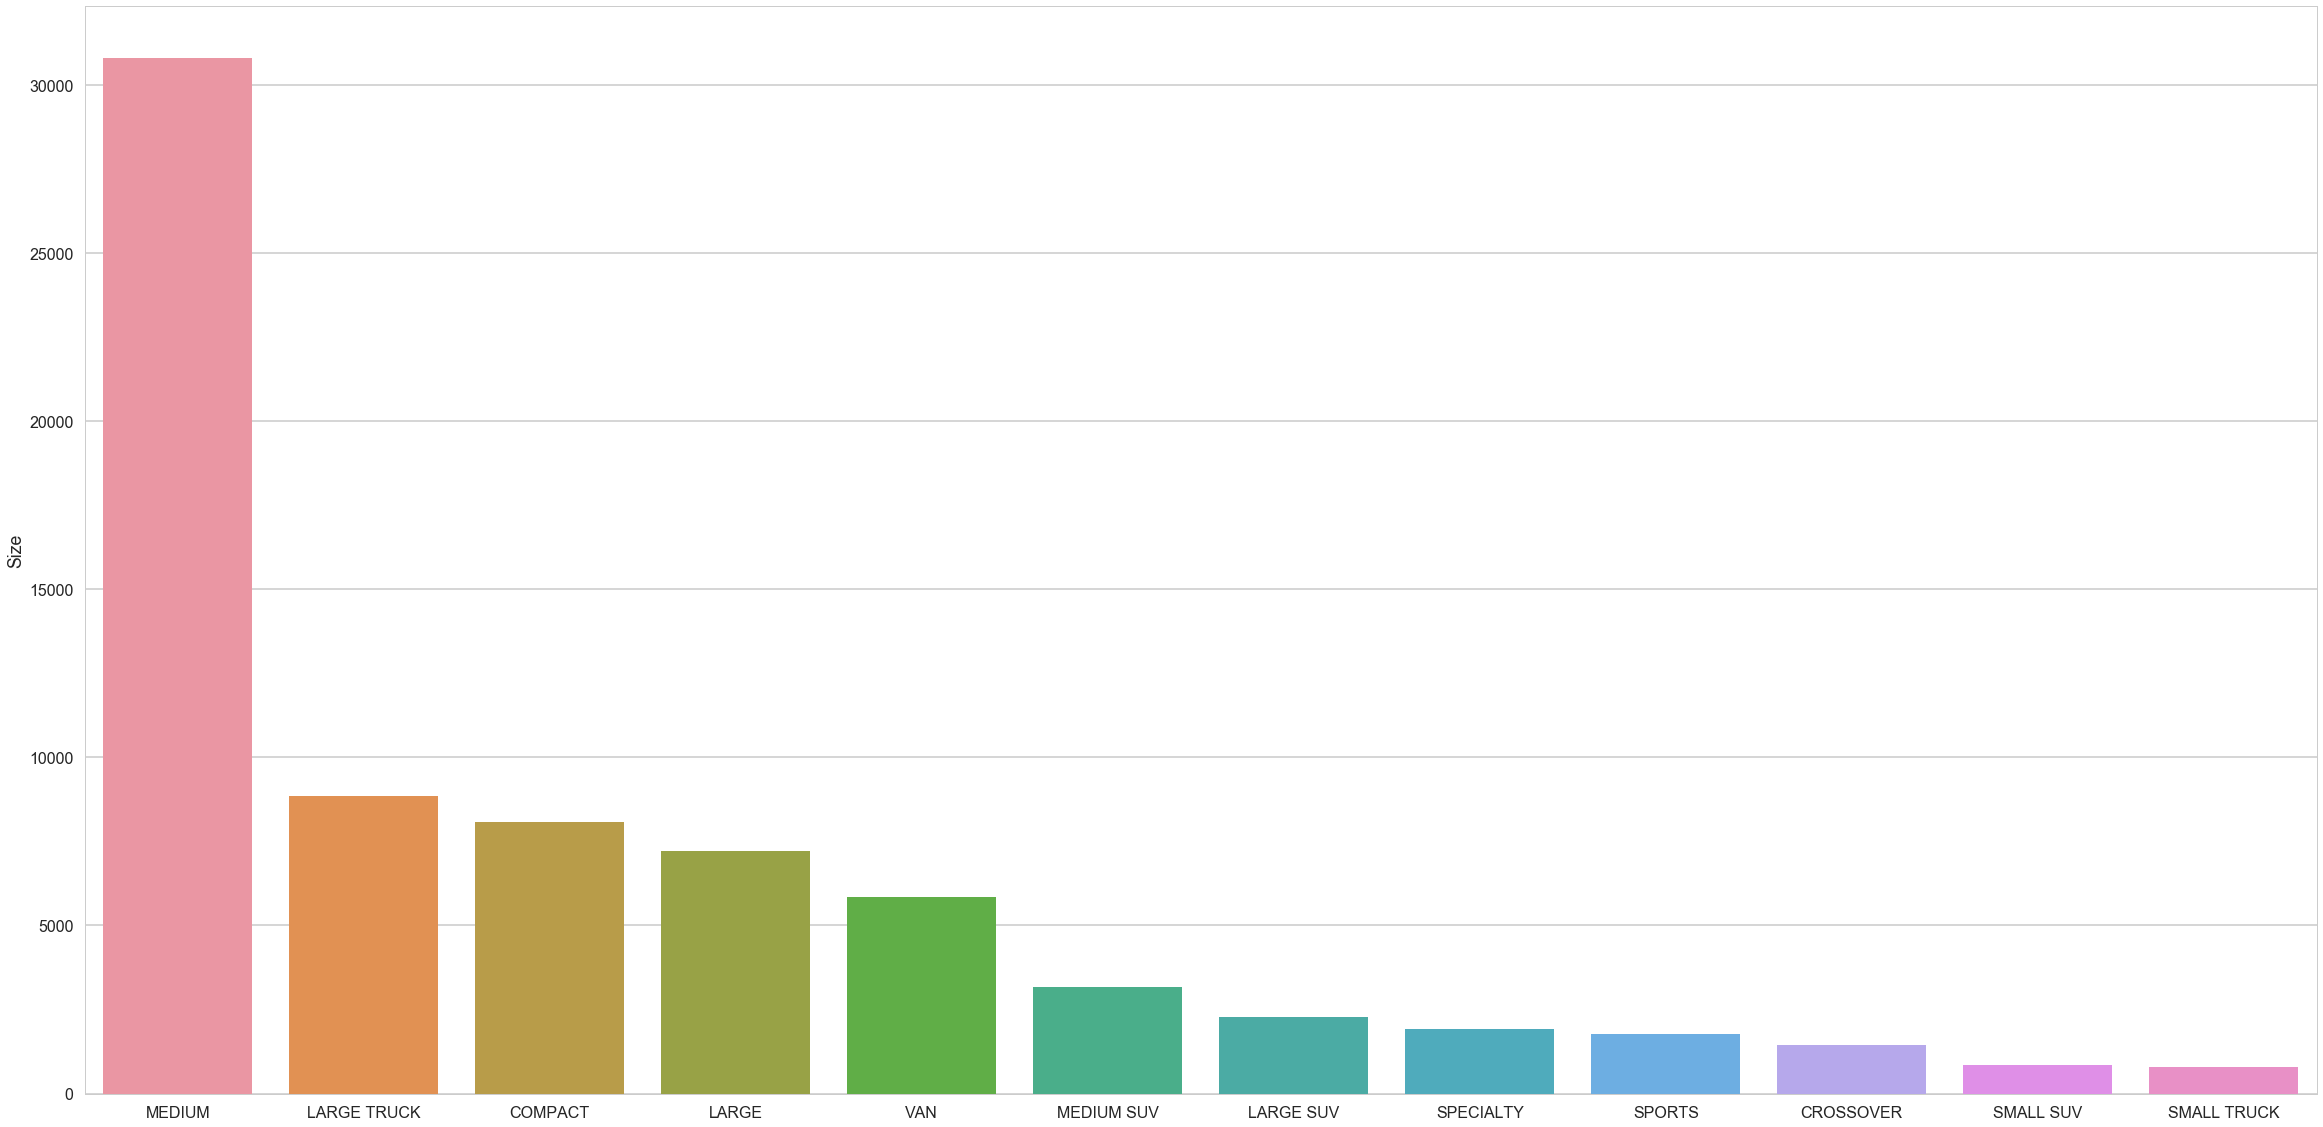

In [71]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(40,20))
sea.barplot( x = df['Size'].unique(), y = df['Size'].value_counts(), data = df)


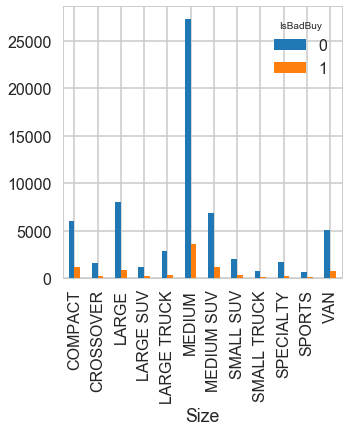

In [72]:
#WheelType   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["Size"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(5,5), stacked=False)

#### Explore TopThreeAmericanName (Categorical)

In [73]:
# See how many unique values there are
print(df['TopThreeAmericanName'].nunique())

4


In [74]:
#See a list of the unique values
print(df['TopThreeAmericanName'].unique())

['OTHER' 'CHRYSLER' 'FORD' 'GM' nan]


In [75]:
# Get a count of missing values in this feature
print(df['TopThreeAmericanName'].isnull().sum())

5


In [76]:
#We will fill the mnissing with the most popular of the top 3
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].fillna(df['TopThreeAmericanName'].mode()[0])


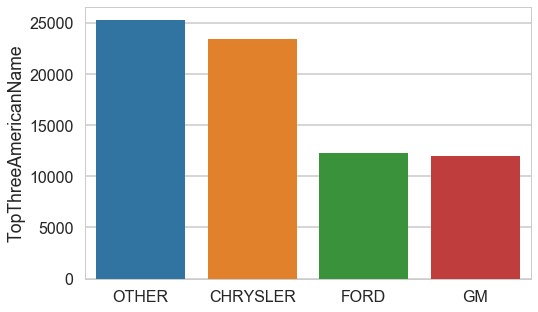

In [77]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(8,5))
sea.barplot( x = df['TopThreeAmericanName'].unique(), y = df['TopThreeAmericanName'].value_counts(), data = df)


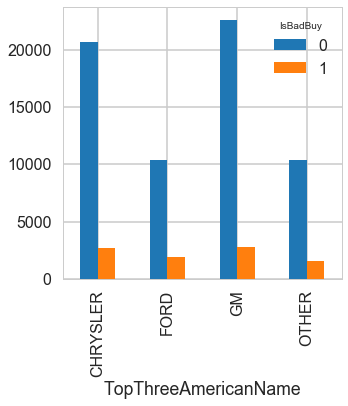

In [78]:
#WheelType   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["TopThreeAmericanName"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(5,5), stacked=False)

#### Explore PRIMEUNIT (Categorical)

In [79]:
# See how many unique values there are
print(df['PRIMEUNIT'].nunique())

2


In [80]:
#See a list of the unique values
print(df['PRIMEUNIT'].unique())

[nan 'NO' 'YES']


In [81]:
# Get a count of missing values in this feature
print(df['PRIMEUNIT'].isnull().sum())

69564


In [82]:
#Most of the Prime unit data is missing, to see whether the data we have is significant, we create another category for it
df["PRIMEUNIT"].fillna('OTHER', inplace =True)


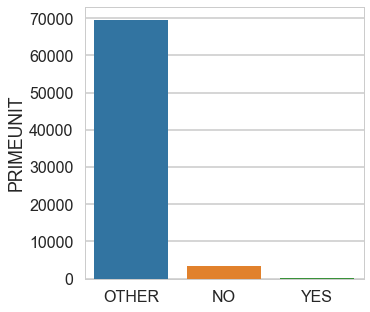

In [83]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.barplot( x = df['PRIMEUNIT'].unique(), y = df['PRIMEUNIT'].value_counts(), data = df)


#### Explore AUCGUART (Categorical)

In [84]:
# See how many unique values there are
print(df['AUCGUART'].nunique())

2


In [85]:
#See a list of the unique values
print(df['AUCGUART'].unique())

[nan 'GREEN' 'RED']


In [86]:
# Get a count of missing values in this feature
print(df['AUCGUART'].isnull().sum())

69564


In [87]:
#Same as above, it belows to the same 8 records. It would probably be easier to just delete these 8 records, but we will keep them
df["AUCGUART"].fillna('OTHER', inplace =True)

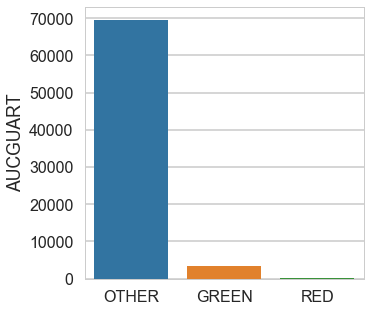

In [88]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.barplot( x = df['AUCGUART'].unique(), y = df['AUCGUART'].value_counts(), data = df)


#### Explore VNZIP (Categorical)

In [89]:
# See how many unique values there are
print(df['VNZIP1'].nunique())

153


In [90]:
#See a list of the unique values
print(df['VNZIP1'].unique())

[33619 20166 50111 72117 55369 38118 17406 16137 34203 45005 35004 48265
 75061 78610 60440 60445  2764 77301 85040 30272 37138 27542 21075 94544
 21014 77041 79605 84104 95673 97060 75020 92807 29697 32824 29461 76101
 37421 80022 43207 85018 75236 76040 83716 97402 89506 85248 16066 29532
 25177 32124 76063 35613 38637 80229 75050 73108 85009 80011 74135 79932
 85284 32812 89139 27407 91763 78745 80112 32225 87109 70002 77073 25071
 45011 38128 32750 34761 90045 22403 46803 30331 30529 60443 89120 89165
 70460 85353 22801 19440 64161 99224 64153 17028 91770 33809 33314 85260
 70401 47129 17545 30315 83687 87105 32503 78219 29323  3106 39402 26431
 37122  8505 12552 92101 85338 90650 73129 68138 85204 97217 33073 23606
 30120 42104 29070 39208 23234 92504 92057 46239 62207 71119 77086 78754
 32772 33311 98064 92337 37771 91752 33916 78426 33762 63044 28625 85226
 37210 28273 77061 84087 33411 80817 32219 78227 30212]


In [91]:
# Get a count of missing values in this feature
print(df['VNZIP1'].isnull().sum())

0


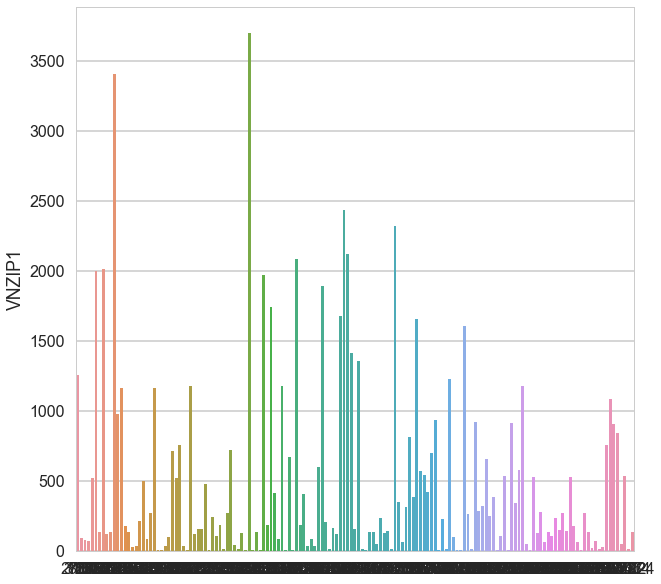

In [92]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(10,10))
sea.barplot( x = df['VNZIP1'].unique(), y = df['VNZIP1'].value_counts(), data = df)


#### Explore VNST (Categorical)

In [93]:
# See how many unique values there are
print(df['VNST'].nunique())

37


In [94]:
#See a list of the unique values
print(df['VNST'].unique())

['FL' 'VA' 'IA' 'AR' 'MN' 'TN' 'PA' 'OH' 'AL' 'MI' 'TX' 'IL' 'MA' 'AZ' 'GA'
 'NC' 'MD' 'CA' 'UT' 'OR' 'SC' 'CO' 'ID' 'NV' 'WV' 'MS' 'OK' 'NM' 'LA' 'IN'
 'MO' 'WA' 'NH' 'NJ' 'NY' 'NE' 'KY']


In [95]:
# Get a count of missing values in this feature
print(df['VNST'].isnull().sum())

0


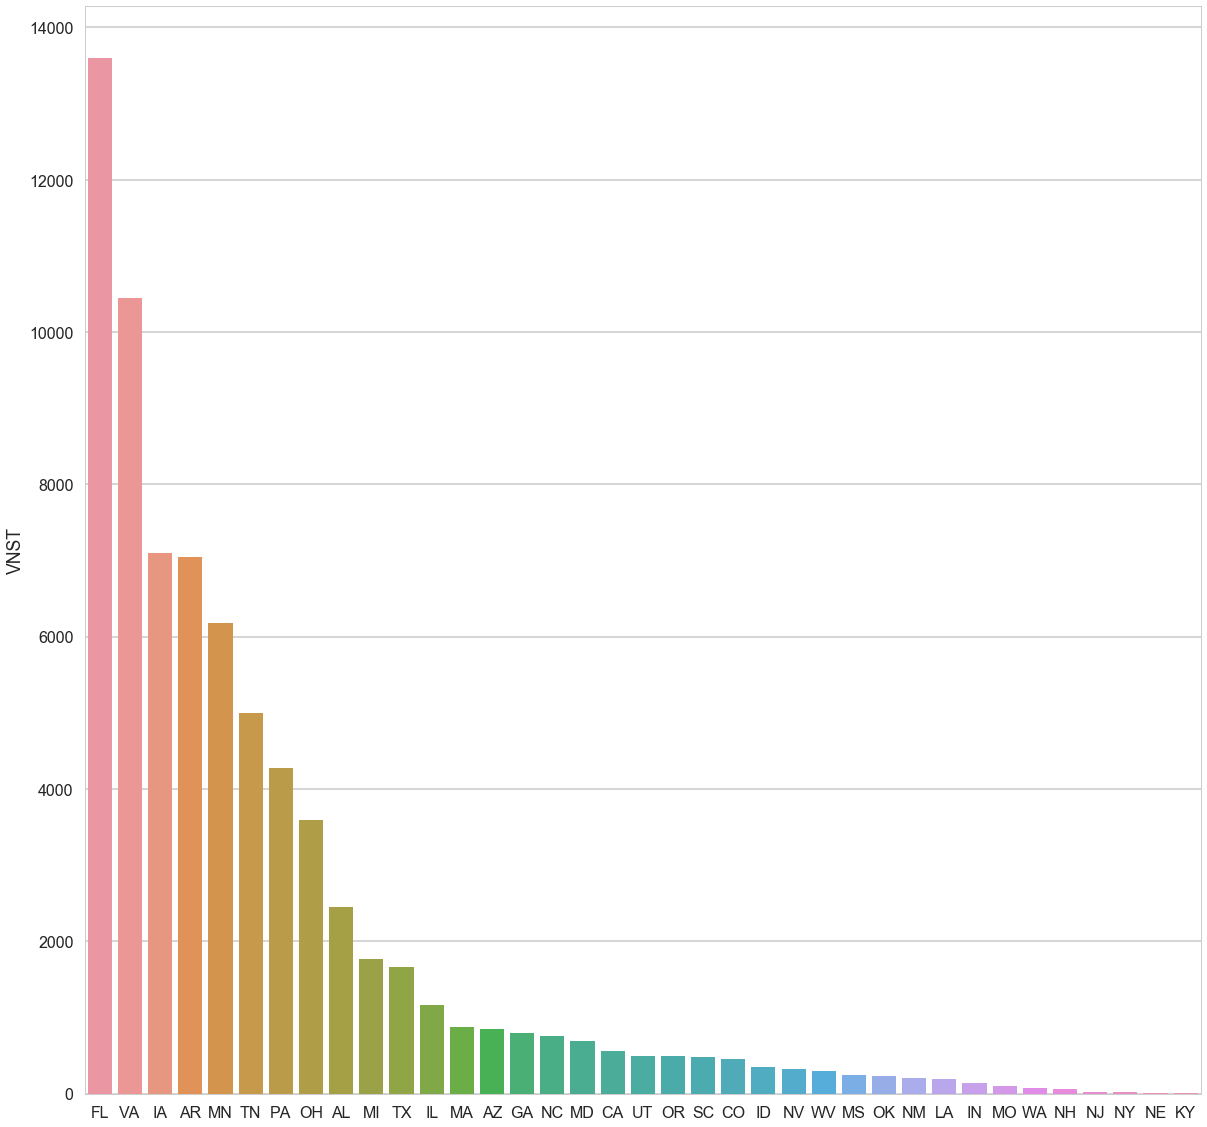

In [96]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(20,20))
sea.barplot( x = df['VNST'].unique(), y = df['VNST'].value_counts(), data = df)


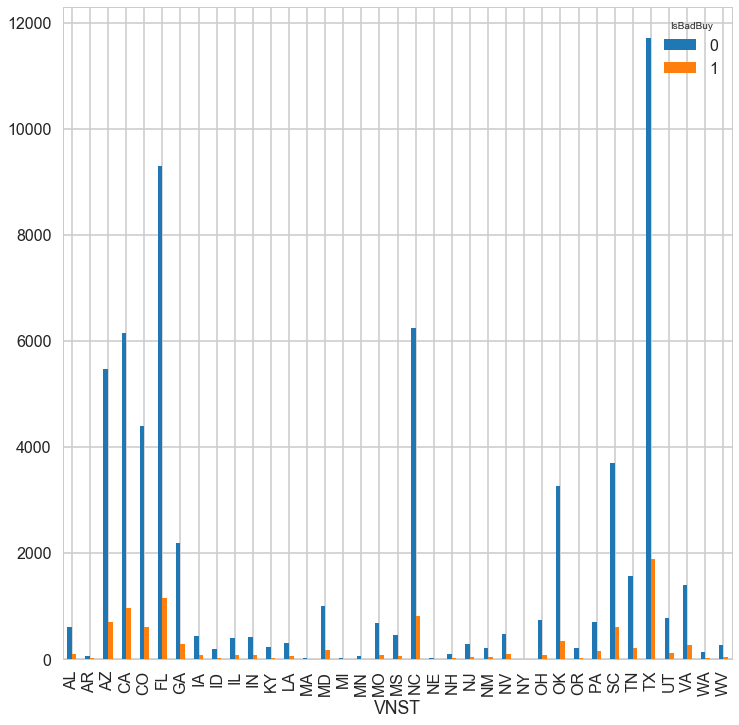

In [97]:
#WheelType   V.S.   IsBadBuy
stacked_bar = pd.crosstab(index=df["VNST"], columns=df["IsBadBuy"])

stacked_bar.plot(kind="bar", figsize=(12,12), stacked=False)

#### Explore IsOnlineSale (Categorical)

In [98]:
# See how many unique values there are
print(df['IsOnlineSale'].nunique())

2


In [99]:
#See a list of the unique values
print(df['IsOnlineSale'].unique())

[0 1]


In [100]:
# Get a count of missing values in this feature
print(df['IsOnlineSale'].isnull().sum())

0


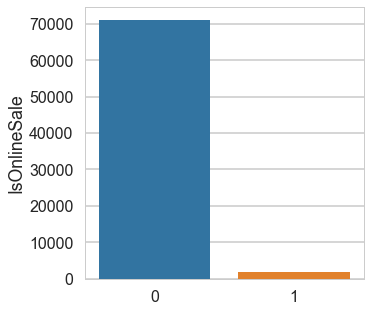

In [101]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.barplot( x = df['IsOnlineSale'].unique(), y = df['IsOnlineSale'].value_counts(), data = df)

#### Explore VehOdo (Continuous)

In [102]:
# See how many unique values there are
print(df['VehOdo'].nunique())

39947


In [103]:
#See a list of the unique values
print(df['VehOdo'].unique())

[89046 93593 73807 ..., 65399 45234 66855]


In [104]:
# Get a count of missing values in this feature
print(df['VehOdo'].isnull().sum())

0


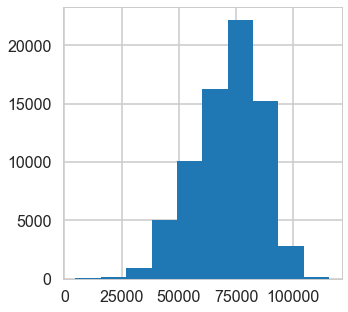

In [105]:
#Look at distribution bar plot
plot = df['VehOdo'].hist()

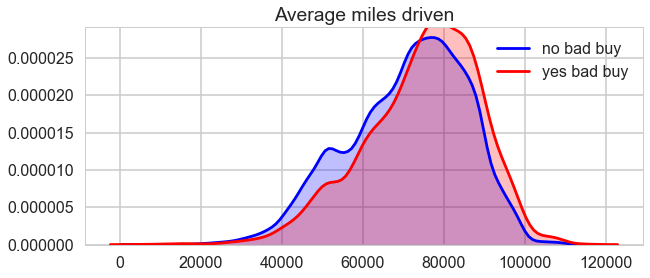

In [106]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'VehOdo'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'VehOdo'] , color='r',shade=True, label='yes bad buy')
plt.title('Average miles driven')

#### Explore MMRAcquisitionAuctionAveragePrice (Continous)

In [107]:
# See how many unique values there are
print(df['MMRAcquisitionAuctionAveragePrice'].nunique())

10342


In [108]:
#See a list of the unique values
print(df['MMRAcquisitionAuctionAveragePrice'].unique())

[  8155.   6854.   3202. ...,  10622.   1449.   9842.]


In [109]:
# Get a count of missing values in this feature
print(df['MMRAcquisitionAuctionAveragePrice'].isnull().sum())

18


In [110]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].mode()[0])


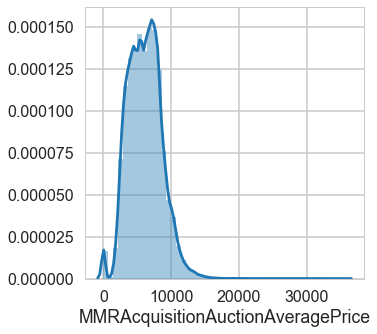

In [111]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRAcquisitionAuctionAveragePrice']); 

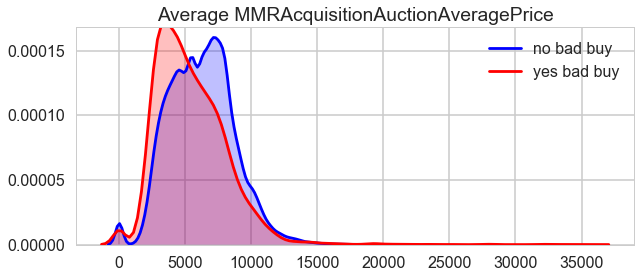

In [112]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRAcquisitionAuctionAveragePrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRAcquisitionAuctionAveragePrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRAcquisitionAuctionAveragePrice')

In [113]:
#Check for Skewness
print("Skewness: %f" % df['MMRAcquisitionAuctionAveragePrice'].skew())


Skewness: 0.460680


In [114]:
print("Kurtosis: %f" % df['MMRAcquisitionAuctionAveragePrice'].kurt())


Kurtosis: 1.591424


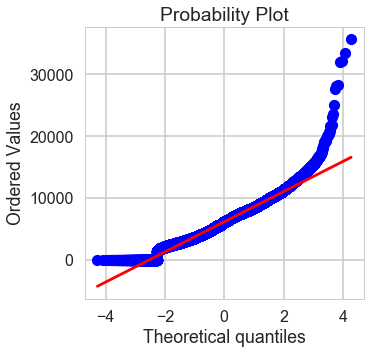

In [115]:
res = stats.probplot(df['MMRAcquisitionAuctionAveragePrice'], plot=plt) #Q-Q plot


#### Explore MMRAcquisitionAuctionCleanPrice (Continous)

In [116]:
# See how many unique values there are
print(df['MMRAcquisitionAuctionCleanPrice'].nunique())

11379


In [117]:
#See a list of the unique values
print(df['MMRAcquisitionAuctionCleanPrice'].unique())

[  9829.   8383.   4760. ...,  12571.   2219.  13568.]


In [118]:
# Get a count of missing values in this feature
print(df['MMRAcquisitionAuctionCleanPrice'].isnull().sum())

18


In [119]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].mode()[0])


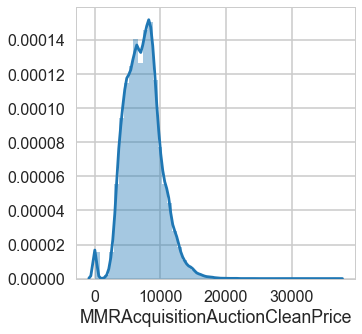

In [120]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRAcquisitionAuctionCleanPrice']); 

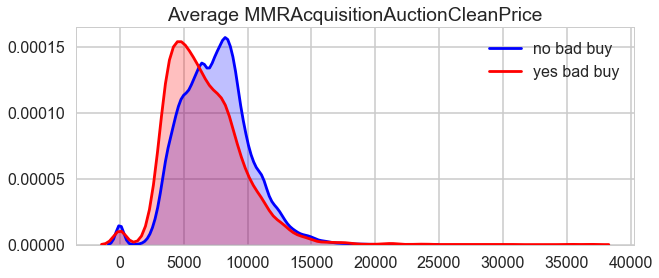

In [121]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRAcquisitionAuctionCleanPrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRAcquisitionAuctionCleanPrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRAcquisitionAuctionCleanPrice')

In [122]:
#Check for Skewness
print("Skewness: %f" % df['MMRAcquisitionAuctionCleanPrice'].skew())


Skewness: 0.462409


In [123]:
print("Kurtosis: %f" % df['MMRAcquisitionAuctionCleanPrice'].kurt())


Kurtosis: 1.649968


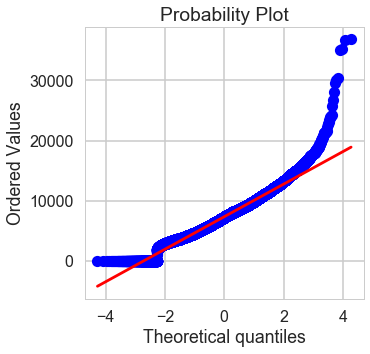

In [124]:
res = stats.probplot(df['MMRAcquisitionAuctionCleanPrice'], plot=plt) #Q-Q plot


#### Explore MMRAcquisitionRetailAveragePrice (Continous)

In [125]:
# See how many unique values there are
print(df['MMRAcquisitionRetailAveragePrice'].nunique())

12725


In [126]:
#See a list of the unique values
print(df['MMRAcquisitionRetailAveragePrice'].unique())

[ 11636.  10897.   6943. ...,   2606.  12161.   2065.]


In [127]:
# Get a count of missing values in this feature
print(df['MMRAcquisitionRetailAveragePrice'].isnull().sum())

18


In [128]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].mode()[0])


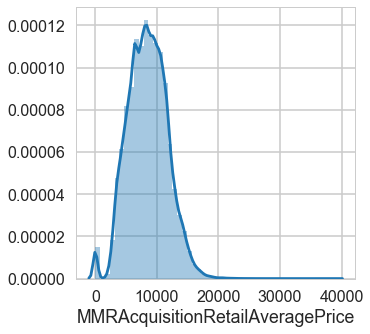

In [129]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRAcquisitionRetailAveragePrice']); 

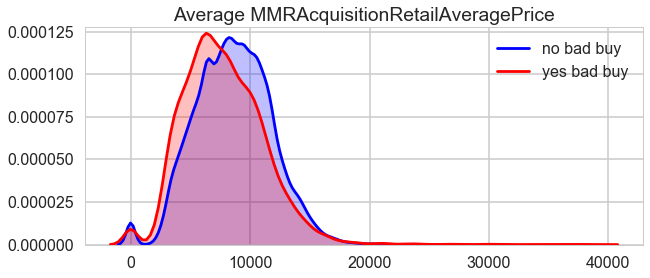

In [130]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRAcquisitionRetailAveragePrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRAcquisitionRetailAveragePrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRAcquisitionRetailAveragePrice')

In [131]:
#Check for Skewness
print("Skewness: %f" % df['MMRAcquisitionRetailAveragePrice'].skew())


Skewness: 0.205870


In [132]:
print("Kurtosis: %f" % df['MMRAcquisitionRetailAveragePrice'].kurt())


Kurtosis: 0.681840


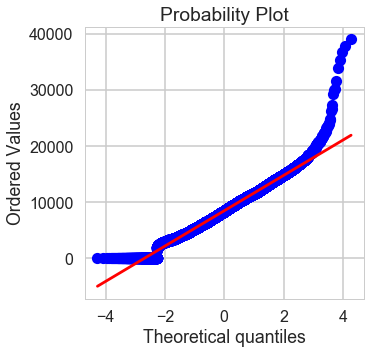

In [133]:
res = stats.probplot(df['MMRAcquisitionRetailAveragePrice'], plot=plt) #Q-Q plot


#### Explore MMRAcquisitonRetailCleanPrice (Continous)

In [134]:
# See how many unique values there are
print(df['MMRAcquisitonRetailCleanPrice'].nunique())

13456


In [135]:
#See a list of the unique values
print(df['MMRAcquisitonRetailCleanPrice'].unique())

[ 13600.  12572.   8457. ...,   2897.   3602.   4937.]


In [136]:
# Get a count of missing values in this feature
print(df['MMRAcquisitonRetailCleanPrice'].isnull().sum())

18


In [137]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].mode()[0])


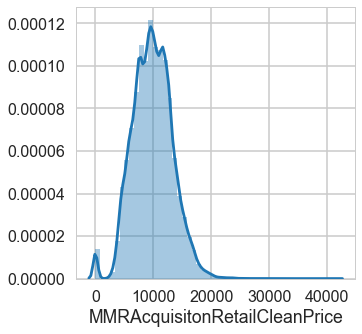

In [138]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRAcquisitonRetailCleanPrice']);  

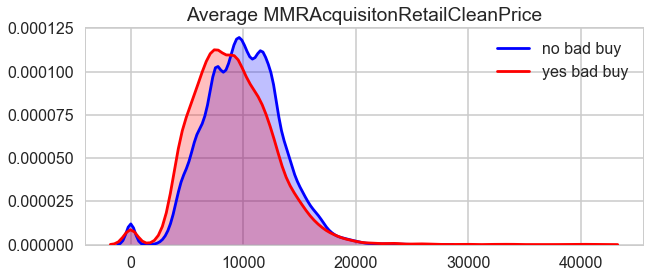

In [139]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRAcquisitonRetailCleanPrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRAcquisitonRetailCleanPrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRAcquisitonRetailCleanPrice')

In [140]:
#Check for Skewness
print("Skewness: %f" % df['MMRAcquisitonRetailCleanPrice'].skew())


Skewness: 0.171864


In [141]:
print("Kurtosis: %f" % df['MMRAcquisitonRetailCleanPrice'].kurt())


Kurtosis: 0.927553


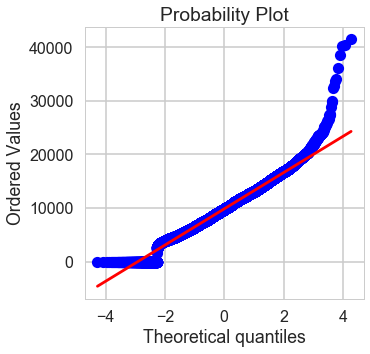

In [142]:
res = stats.probplot(df['MMRAcquisitonRetailCleanPrice'], plot=plt) #Q-Q plot


#### Explore MMRCurrentAuctionAveragePrice (Continous)

In [143]:
# See how many unique values there are
print(df['MMRCurrentAuctionAveragePrice'].nunique())

10315


In [144]:
#See a list of the unique values
print(df['MMRCurrentAuctionAveragePrice'].unique())

[  7451.   7456.   4035. ...,   1782.   9778.  13646.]


In [145]:
# Get a count of missing values in this feature
print(df['MMRCurrentAuctionAveragePrice'].isnull().sum())

315


In [146]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].mode()[0])


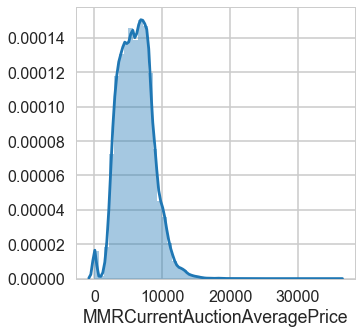

In [147]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRCurrentAuctionAveragePrice']);                  #histogram


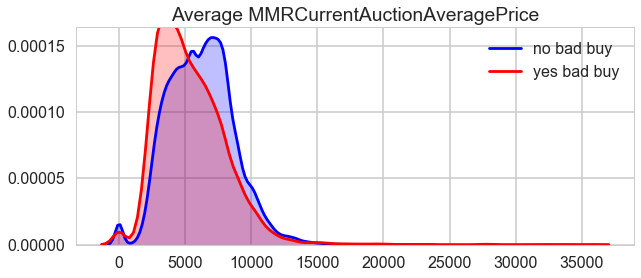

In [148]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRCurrentAuctionAveragePrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRCurrentAuctionAveragePrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRCurrentAuctionAveragePrice')

In [149]:
#Check for Skewness
print("Skewness: %f" % df['MMRCurrentAuctionAveragePrice'].skew())


Skewness: 0.468502


In [150]:
print("Kurtosis: %f" % df['MMRCurrentAuctionAveragePrice'].kurt())


Kurtosis: 1.495761


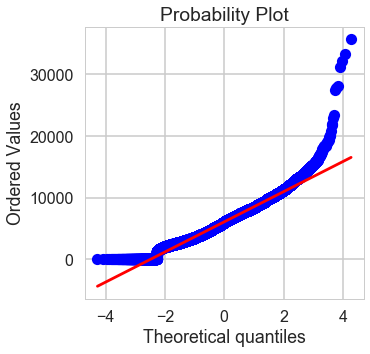

In [151]:
res = stats.probplot(df['MMRCurrentAuctionAveragePrice'], plot=plt) #Q-Q plot


#### Explore MMRCurrentAuctionCleanPrice (Continous)

In [152]:
# See how many unique values there are
print(df['MMRCurrentAuctionCleanPrice'].nunique())

11265


In [153]:
#See a list of the unique values
print(df['MMRCurrentAuctionCleanPrice'].unique())

[  8552.   9222.   5557. ...,  13262.  11424.  15015.]


In [154]:
# Get a count of missing values in this feature
print(df['MMRCurrentAuctionCleanPrice'].isnull().sum())

315


In [155]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].mode()[0])


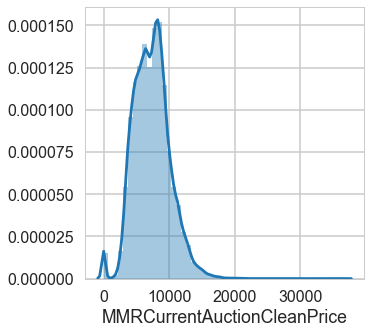

In [156]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRCurrentAuctionCleanPrice']);                  #histogram


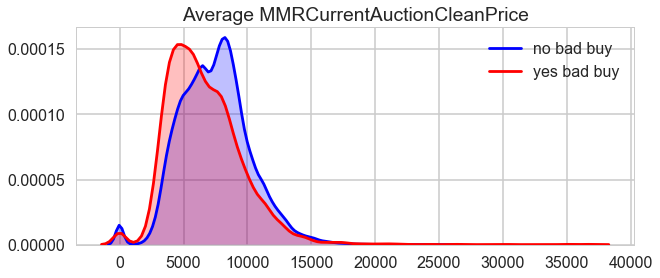

In [157]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRCurrentAuctionCleanPrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRCurrentAuctionCleanPrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRCurrentAuctionCleanPrice')

In [158]:
#Check for Skewness
print("Skewness: %f" % df['MMRCurrentAuctionCleanPrice'].skew())


Skewness: 0.460334


In [159]:
print("Kurtosis: %f" % df['MMRCurrentAuctionCleanPrice'].kurt())


Kurtosis: 1.554534


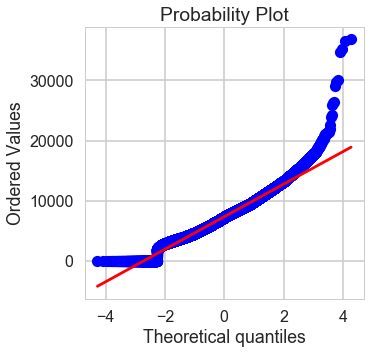

In [160]:
res = stats.probplot(df['MMRCurrentAuctionCleanPrice'], plot=plt) #Q-Q plot


#### Explore MMRCurrentRetailAveragePrice (Continous)

In [161]:
# See how many unique values there are
print(df['MMRCurrentRetailAveragePrice'].nunique())

12493


In [162]:
#See a list of the unique values
print(df['MMRCurrentRetailAveragePrice'].unique())

[ 11597.  11374.   7146. ...,   2425.  13591.  17619.]


In [163]:
# Get a count of missing values in this feature
print(df['MMRCurrentRetailAveragePrice'].isnull().sum())

315


In [164]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].mode()[0])


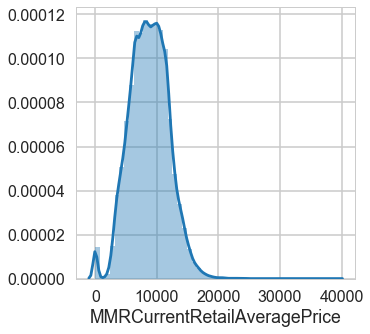

In [165]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRCurrentRetailAveragePrice']); 

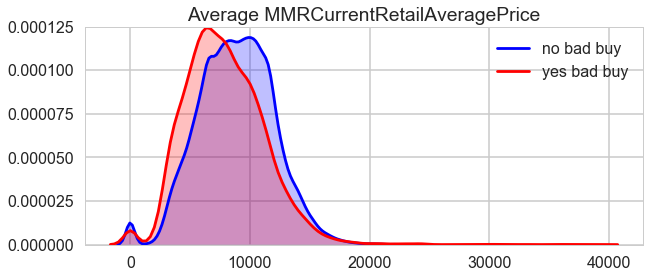

In [166]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRCurrentRetailAveragePrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRCurrentRetailAveragePrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRCurrentRetailAveragePrice')

In [167]:
#Check for Skewness
print("Skewness: %f" % df['MMRCurrentRetailAveragePrice'].skew())


Skewness: 0.133447


In [168]:
print("Kurtosis: %f" % df['MMRCurrentRetailAveragePrice'].kurt())


Kurtosis: 0.682818


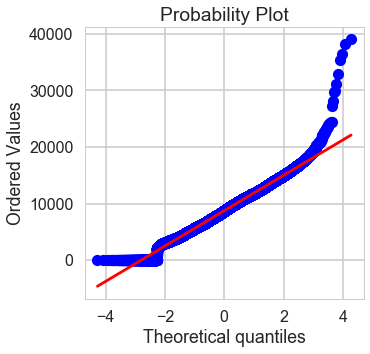

In [169]:
res = stats.probplot(df['MMRCurrentRetailAveragePrice'], plot=plt) #Q-Q plot


#### Explore MMRCurrentRetailCleanPrice (Continous)

In [170]:
# See how many unique values there are
print(df['MMRCurrentRetailCleanPrice'].nunique())

13192


In [171]:
#See a list of the unique values
print(df['MMRCurrentRetailCleanPrice'].unique())

[ 12409.  12791.   8702. ...,  17702.  19161.  14402.]


In [172]:
# Get a count of missing values in this feature
print(df['MMRCurrentRetailCleanPrice'].isnull().sum())

315


In [173]:
#Since there are a small number of missing values we will take the most freguent one to impute
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].mode()[0])


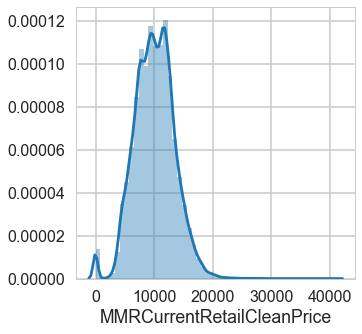

In [174]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['MMRCurrentRetailCleanPrice']);                  #histogram


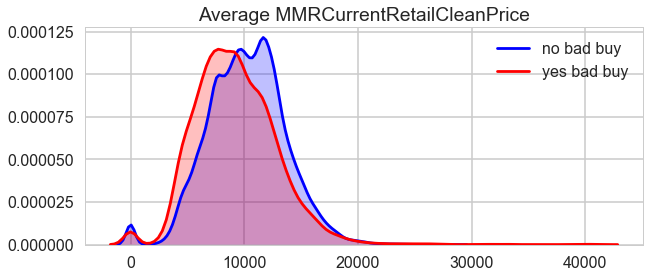

In [175]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'MMRCurrentRetailCleanPrice'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'MMRCurrentRetailCleanPrice'] , color='r',shade=True, label='yes bad buy')
plt.title('Average MMRCurrentRetailCleanPrice')

In [176]:
#Check for Skewness
print("Skewness: %f" % df['MMRCurrentRetailCleanPrice'].skew())


Skewness: 0.105066


In [177]:
print("Kurtosis: %f" % df['MMRCurrentRetailCleanPrice'].kurt())


Kurtosis: 0.927720


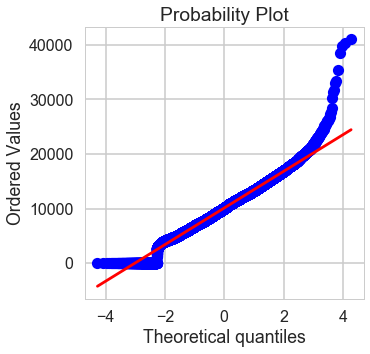

In [178]:
res = stats.probplot(df['MMRCurrentRetailCleanPrice'], plot=plt) #Q-Q plot


#### Explore VehBCost (Continous)

In [179]:
# See how many unique values there are
print(df['VehBCost'].nunique())

2072


In [180]:
#See a list of the unique values
print(df['VehBCost'].unique())

[  7100.   7600.   4900. ...,  11580.  11945.   3205.]


In [181]:
# Get a count of missing values in this feature
print(df['VehBCost'].isnull().sum())

0


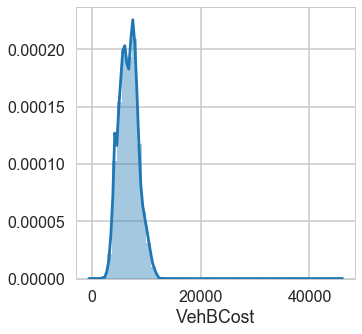

In [182]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['VehBCost']); 

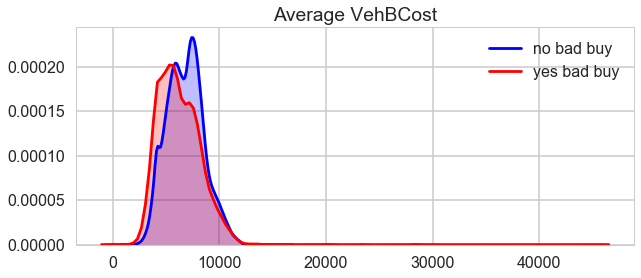

In [183]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'VehBCost'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'VehBCost'] , color='r',shade=True, label='yes bad buy')
plt.title('Average VehBCost')

In [184]:
#Check for Skewness
print("Skewness: %f" % df['VehBCost'].skew())

Skewness: 0.715931


In [185]:
print("Kurtosis: %f" % df['VehBCost'].kurt())

Kurtosis: 8.144378


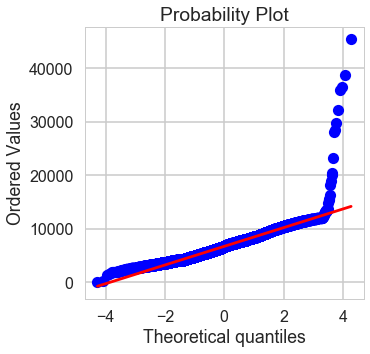

In [186]:
res = stats.probplot(df['VehBCost'], plot=plt) #Q-Q plot


#### Explore WarrantyCost (Continous)

In [187]:
# See how many unique values there are
print(df['WarrantyCost'].nunique())

281


In [188]:
#See a list of the unique values
print(df['WarrantyCost'].unique())

[1113 1053 1389  630 1020  594  533  825  482 1633 1373  869 1623  686 1455
 1243 1923 1703 1551 2003 5613  671  728  754 2452  920 1411 1763 1220 1272
 2322 1506  971 1215 2152  569 1155 1003 1283  623  723 1086 1503 1103 1209
 1974 1641  462  803  983 2063  588 1137  986 1413 1583 1169  853 1134  975
 1028 1118 1038 1806 1341 1313 1469 1125 1320  505 1497 1223  834 5392 1930
 1153  582 1774  923  693 1800 1689 2074 1398 2274 2712 1485 1500 1673 2651
  930 1740 1543 2218 4032 1275 1630 1508 1054  837 2351  702  620  905 1197
 1353 2157  894  822  764  805 2282 1450 1251 1046 1769 2495 1065 1290 1216
  833 3115  909 1906 6519 1803  782 1666 2040 3676 1515  993 2198 2506 1023
 1606 2022 1481 3667 1628 1711 1857  765 1918  882 3276 3265 3910 1717 2193
 2062 1893 5092 2939 2208 2412 2172 1801  553 1610 1750 3191 6192 2070 2508
 6492 2711 1933  650 1130 2390 1572 2639  762 2091 2206 1634 1116 1334 2499
 1386 1338  522 1613 3967 1062 4922 2391 2362 4210 5913  942 4622 2700 1328
  642 1418 1

In [189]:
# Get a count of missing values in this feature
print(df['WarrantyCost'].isnull().sum())

0


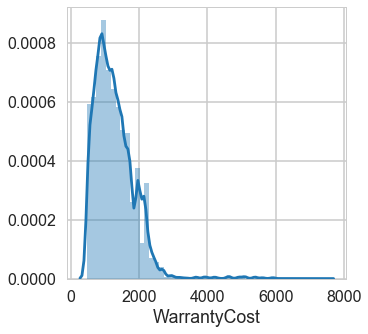

In [190]:
# Since we dealt with missing we can now graph it
sea.mpl.rc("figure", figsize=(5,5))
sea.distplot(df['WarrantyCost']); 

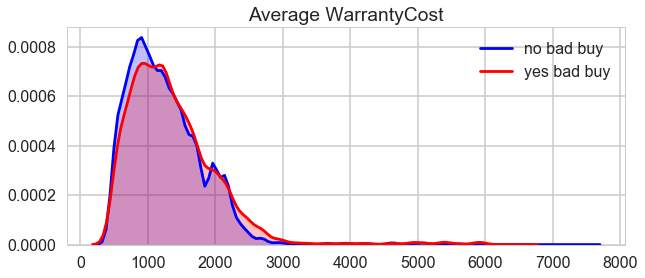

In [191]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
dist0=sea.kdeplot(df.loc[(df['IsBadBuy'] == 0),'WarrantyCost'] , color='b',shade=True, label='no bad buy')
dist1=sea.kdeplot(df.loc[(df['IsBadBuy'] == 1),'WarrantyCost'] , color='r',shade=True, label='yes bad buy')
plt.title('Average WarrantyCost')

In [192]:
#Check for Skewness
print("Skewness: %f" % df['WarrantyCost'].skew())

Skewness: 2.070831


In [193]:
print("Kurtosis: %f" % df['WarrantyCost'].kurt())

Kurtosis: 9.964808


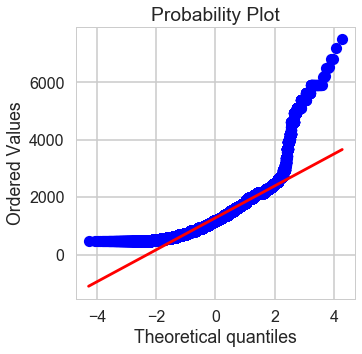

In [194]:
res = stats.probplot(df['WarrantyCost'], plot=plt) #Q-Q plot
